In [1]:
import numpy as np
from functools import partial
from scipy import stats
from nolds import lyap_r
from nolds import lyap_e
from gtda.time_series import takens_embedding_optimal_parameters
from matplotlib import pyplot as plt
from rpy2.robjects.packages import importr
import rpy2.robjects as robjects
from trajectories import generate_trajectories
from plots_and_correlates import get_correlation
from plots_and_correlates import plot_lce_estimate_and_correlation


In [2]:
import ipyparallel as ipp
clients = ipp.Client()
dv = clients.direct_view()
lbv = clients.load_balanced_view()

In [3]:
tseriesChaos = importr("tseriesChaos")
lyap_k = tseriesChaos.lyap_k

In [4]:
SEED = 42
SAMPLES = 500
LENGTHS = [1000, 750, 500]
experimental_data_all = {}
for length in LENGTHS:
    experimental_data_all |= {
        (SEED, length, SAMPLES): generate_trajectories(
            RANDOM_SEED=SEED, TS_LENGTH=length, CONTROL_PARAM_SAMPLES=SAMPLES
        )
    }


Experiment config -- SEED:42, LENGTH:1000, SAMPLES:500
Experiment config -- SEED:42, LENGTH:750, SAMPLES:500
Experiment config -- SEED:42, LENGTH:500, SAMPLES:500


In [5]:
experimental_data = experimental_data_all[42, 1000, 500]

In [6]:
logistic_trajectories = experimental_data["logistic"]["trajectories"]
logistic_lces = experimental_data["logistic"]["lces"]
logistic_control_params = experimental_data["logistic"]["sys_params"]

In [7]:
henon_trajectories = experimental_data["henon"]["trajectories"]
henon_lces = experimental_data["henon"]["lces"]
henon_control_params = experimental_data["henon"]["sys_params"]

In [8]:
ikeda_trajectories = experimental_data["ikeda"]["trajectories"]
ikeda_lces = experimental_data["ikeda"]["lces"]
ikeda_control_params = experimental_data["ikeda"]["sys_params"]

In [9]:
tinkerbell_trajectories = experimental_data["tinkerbell"]["trajectories"]
tinkerbell_lces = experimental_data["tinkerbell"]["lces"]
tinkerbell_control_params = experimental_data["tinkerbell"]["sys_params"]

In [10]:
def get_best_params(ts, max_delay=50, max_dim=8):
    delay, dim = takens_embedding_optimal_parameters(ts, max_delay, max_dim)
    return delay, dim

In [11]:
def trajectories_to_r_vecs(trajectories):
    return [robjects.FloatVector(ts) for ts in trajectories]

In [12]:
def kantz_estimator(
    ts,
    dim=None,
    delay=None,
    theiler_window=5,
    k_neighbours=2,
    max_num_points=200,
    num_iterations=20,
    neighbour_radius=1.0,
):
    """Use R's `tseriesChaos` package and function `lyap_k` to estimate max of Lyapunov spectrum."""
    if dim is None or delay is None:
        delay_, dim_ = get_best_params(ts)
        if dim is None:
            dim = dim_
        if delay is None:
            delay = delay_
    num_points = min(max_num_points, len(ts) - (((dim - 1) * delay) + 1))
    lyapunov_spectrum_estimate = lyap_k(
        ts,
        dim,
        delay,
        t=theiler_window,
        k=k_neighbours,
        ref=num_points,
        s=num_iterations,
        eps=neighbour_radius,
    )
    return np.max(lyapunov_spectrum_estimate)


In [13]:
rosenstein_logistic = lbv.map_sync(lyap_r, logistic_trajectories)

In [14]:
eckmann_logistic_spectra = lbv.map_sync(lyap_e, logistic_trajectories)
eckmann_logistic = np.max(eckmann_logistic_spectra, axis=1)

In [15]:
kantz_estimator_partial = partial(kantz_estimator, k_neighbours=2, neighbour_radius=1.1)
kantz_logistic = np.array(list(map(kantz_estimator_partial, trajectories_to_r_vecs(logistic_trajectories))))

Finding nearests
Keeping  200  reference points
Following points
Finding nearests
Keeping  200  reference points
Following points
Finding nearests
Keeping  200  reference points
Following points
Finding nearests
Keeping  200  reference points
Following points
Finding nearests
Keeping  200  reference points
Following points
Finding nearests
Keeping  200  reference points
Following points
Finding nearests
Keeping  200  reference points
Following points
Finding nearests
Keeping  200  reference points
Following points
Finding nearests
Keeping  200  reference points
Following points
Finding nearests
Keeping  200  reference points
Following points
Finding nearests
Keeping  200  reference points
Following points
Finding nearests
Keeping  200  reference points
Following points
Finding nearests
Keeping  200  reference points
Following points
Finding nearests
Keeping  200  reference points
Following points
Finding nearests
Keeping  200  reference points
Following points
Finding nearests
Keeping 

In [16]:
# rosenstein_henon = lbv.map_sync(lyap_r, henon_trajectories)

CompositeError: one or more exceptions raised in: lyap_r
[3:apply]LinAlgError: SVD did not converge in Linear Least Squares

In [17]:
eckmann_henon_spectra = lbv.map_sync(lyap_e, henon_trajectories)
eckmann_henon = np.max(eckmann_henon_spectra, axis=1)

In [18]:
kantz_estimator_partial = partial(kantz_estimator, k_neighbours=3, neighbour_radius=1.1)
kantz_henon = np.array(list(map(kantz_estimator_partial, trajectories_to_r_vecs(henon_trajectories))))

Finding nearests
Keeping  200  reference points
Following points
Finding nearests
Keeping  200  reference points
Following points
Finding nearests
Keeping  200  reference points
Following points
Finding nearests
Keeping  200  reference points
Following points
Finding nearests
Keeping  200  reference points
Following points
Finding nearests
Keeping  200  reference points
Following points
Finding nearests
Keeping  200  reference points
Following points
Finding nearests
Keeping  200  reference points
Following points
Finding nearests
Keeping  200  reference points
Following points
Finding nearests
Keeping  200  reference points
Following points
Finding nearests
Keeping  200  reference points
Following points
Finding nearests
Keeping  200  reference points
Following points
Finding nearests
Keeping  200  reference points
Following points
Finding nearests
Keeping  200  reference points
Following points
Finding nearests
Keeping  200  reference points
Following points
Finding nearests
Keeping 

In [19]:
rosenstein_ikeda = lbv.map_sync(lyap_r, ikeda_trajectories)

In [20]:
eckmann_ikeda_spectra = lbv.map_sync(lyap_e, ikeda_trajectories)
eckmann_ikeda = np.max(eckmann_ikeda_spectra, axis=1)

In [21]:
kantz_estimator_partial = partial(kantz_estimator, k_neighbours=2, neighbour_radius=1.1)
kantz_ikeda = np.array(list(map(kantz_estimator_partial, trajectories_to_r_vecs(ikeda_trajectories))))

Finding nearests
Keeping  200  reference points
Following points
Finding nearests
Keeping  200  reference points
Following points
Finding nearests
Keeping  200  reference points
Following points
Finding nearests
Keeping  200  reference points
Following points
Finding nearests
Keeping  200  reference points
Following points
Finding nearests
Keeping  200  reference points
Following points
Finding nearests
Keeping  200  reference points
Following points
Finding nearests
Keeping  200  reference points
Following points
Finding nearests
Keeping  200  reference points
Following points
Finding nearests
Keeping  200  reference points
Following points
Finding nearests
Keeping  200  reference points
Following points
Finding nearests
Keeping  200  reference points
Following points
Finding nearests
Keeping  200  reference points
Following points
Finding nearests
Keeping  200  reference points
Following points
Finding nearests
Keeping  200  reference points
Following points
Finding nearests
Keeping 

In [22]:
rosenstein_tinkerbell = lbv.map_sync(lyap_r, tinkerbell_trajectories)

In [36]:
eckmann_tinkerbell_spectra = lbv.map_sync(lyap_e, tinkerbell_trajectories)
eckmann_tinkerbell = np.max(eckmann_tinkerbell_spectra, axis=1)

In [24]:
kantz_estimator_partial = partial(kantz_estimator, k_neighbours=4, neighbour_radius=1.1)
kantz_tinkerbell = np.array(list(map(kantz_estimator_partial, trajectories_to_r_vecs(tinkerbell_trajectories))))

Finding nearests
Keeping  193  reference points
Following points
Finding nearests
Keeping  179  reference points
Following points
Finding nearests
Keeping  200  reference points
Following points
Finding nearests
Keeping  200  reference points
Following points
Finding nearests
Keeping  197  reference points
Following points
Finding nearests
Keeping  198  reference points
Following points
Finding nearests
Keeping  191  reference points
Following points
Finding nearests
Keeping  200  reference points
Following points
Finding nearests
Keeping  199  reference points
Following points
Finding nearests
Keeping  70  reference points
Following points
Finding nearests
Keeping  47  reference points
Following points
Finding nearests
Keeping  89  reference points
Following points
Finding nearests
Keeping  200  reference points
Following points
Finding nearests
Keeping  184  reference points
Following points
Finding nearests
Keeping  163  reference points
Following points
Finding nearests
Keeping  20

In [40]:
correlations = {}

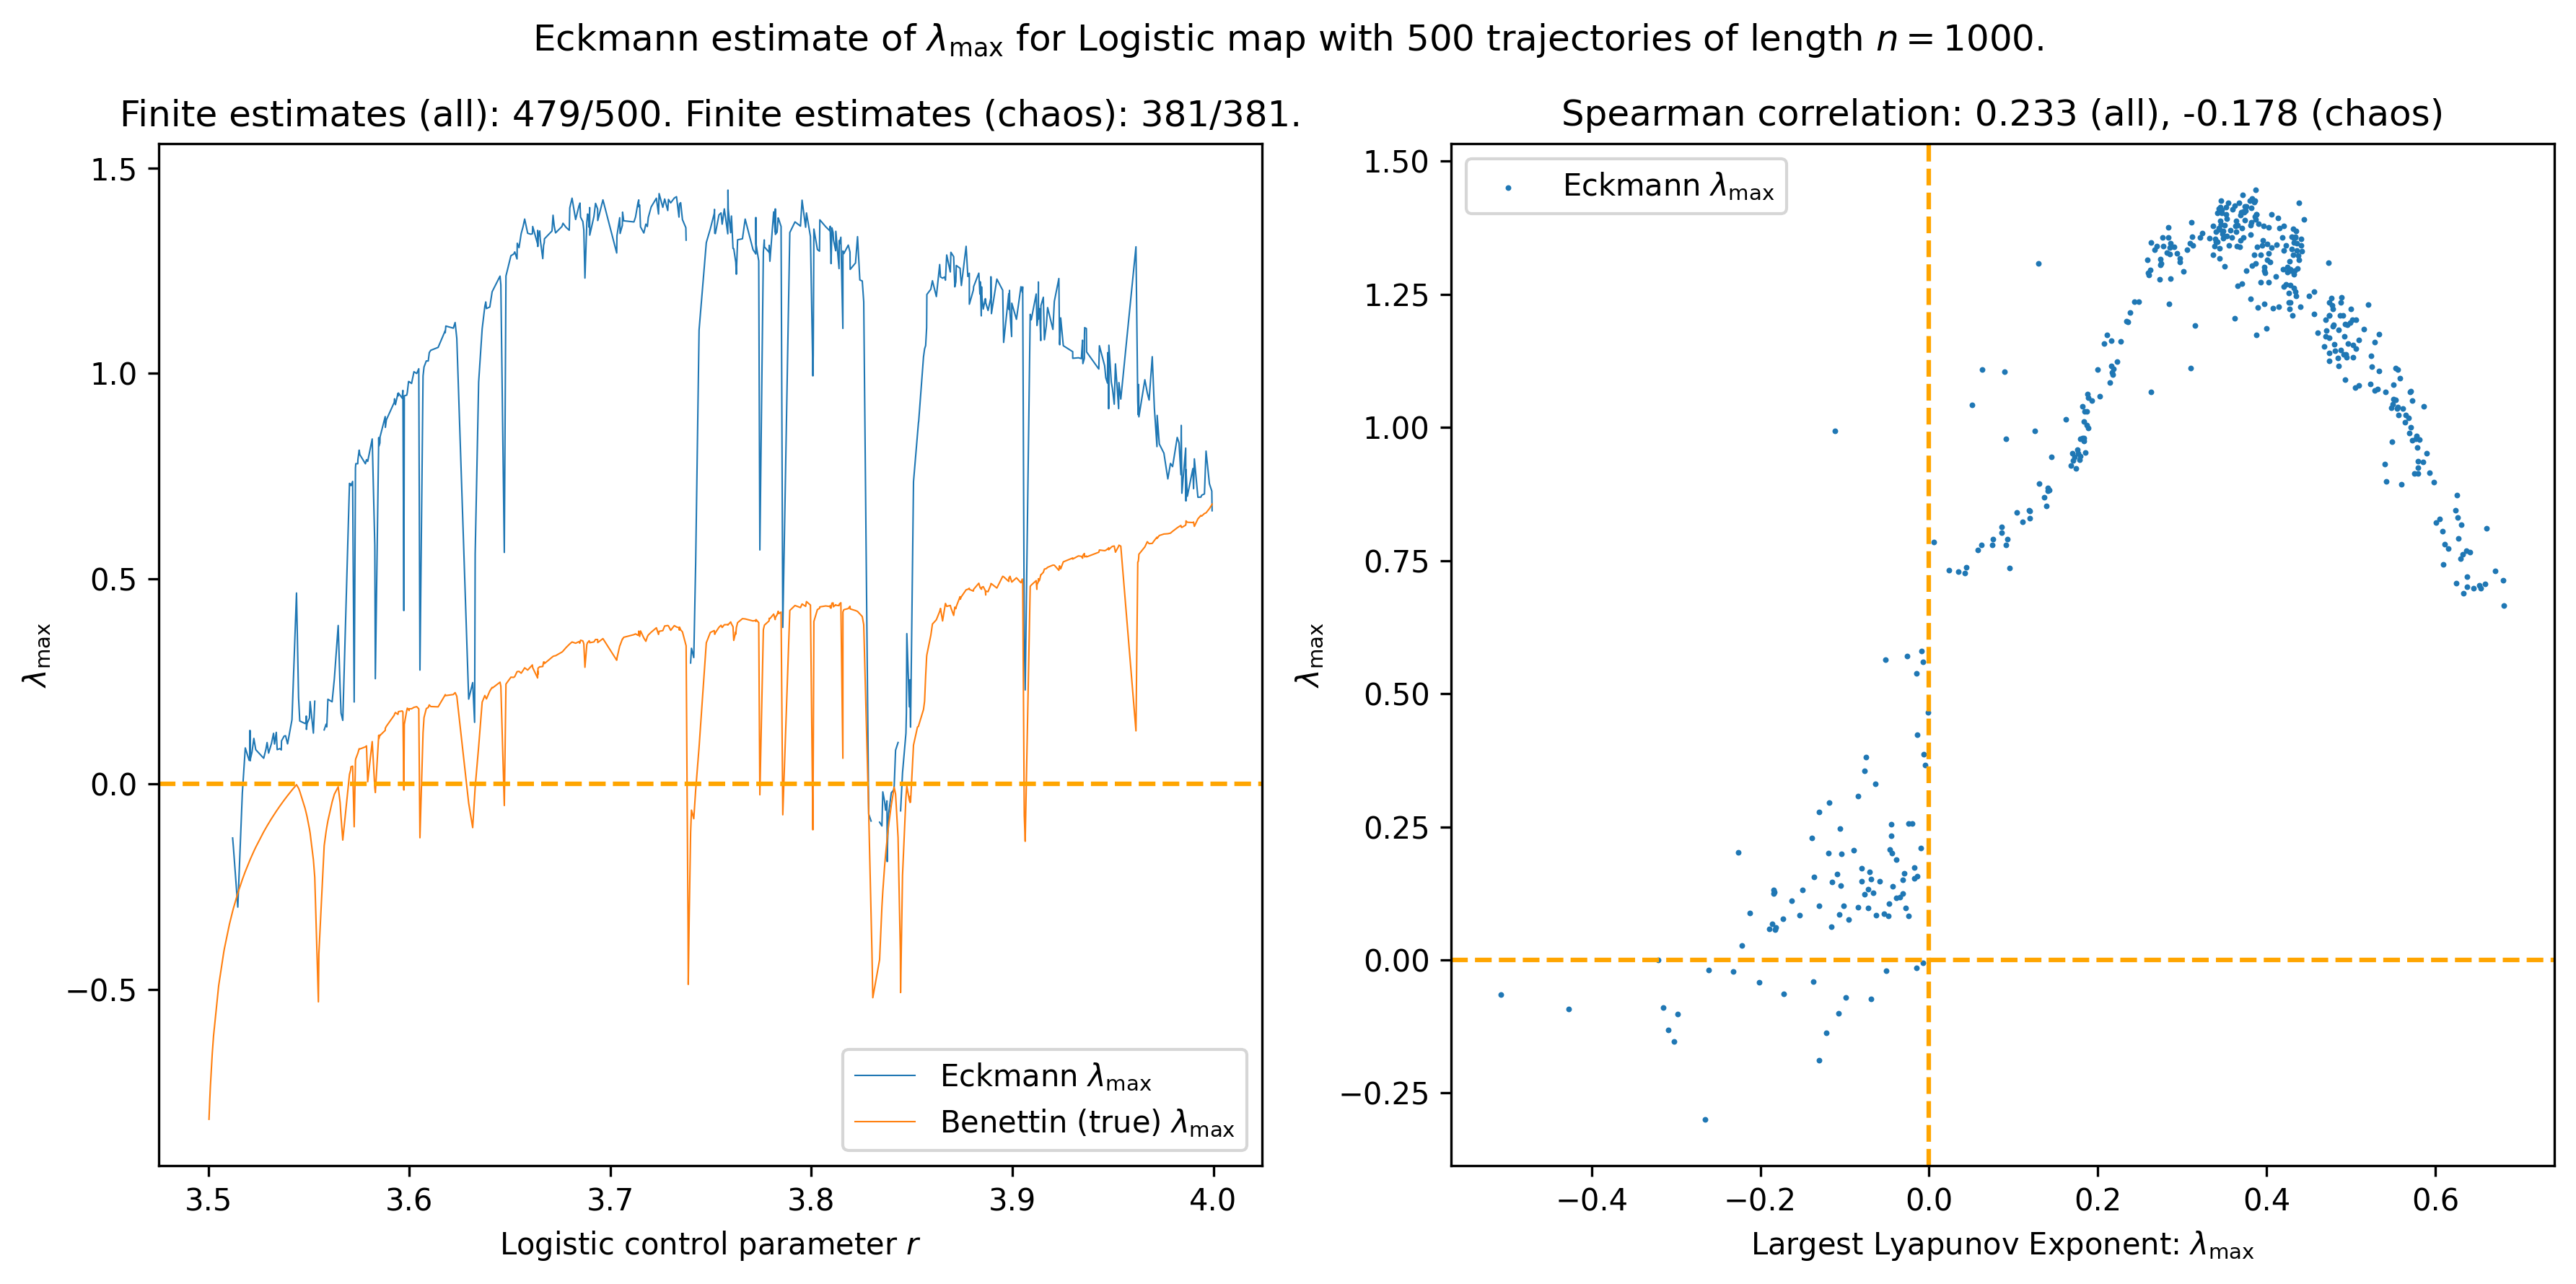

In [41]:
sequence_length = len(logistic_trajectories[0])-1
correlations["Eckmann", "Logistic", sequence_length] = plot_lce_estimate_and_correlation(
    "Eckmann",
    "Logistic",
    "r",
    eckmann_logistic,
    logistic_lces,
    logistic_control_params,
    sequence_length,
    sharey=False,
)


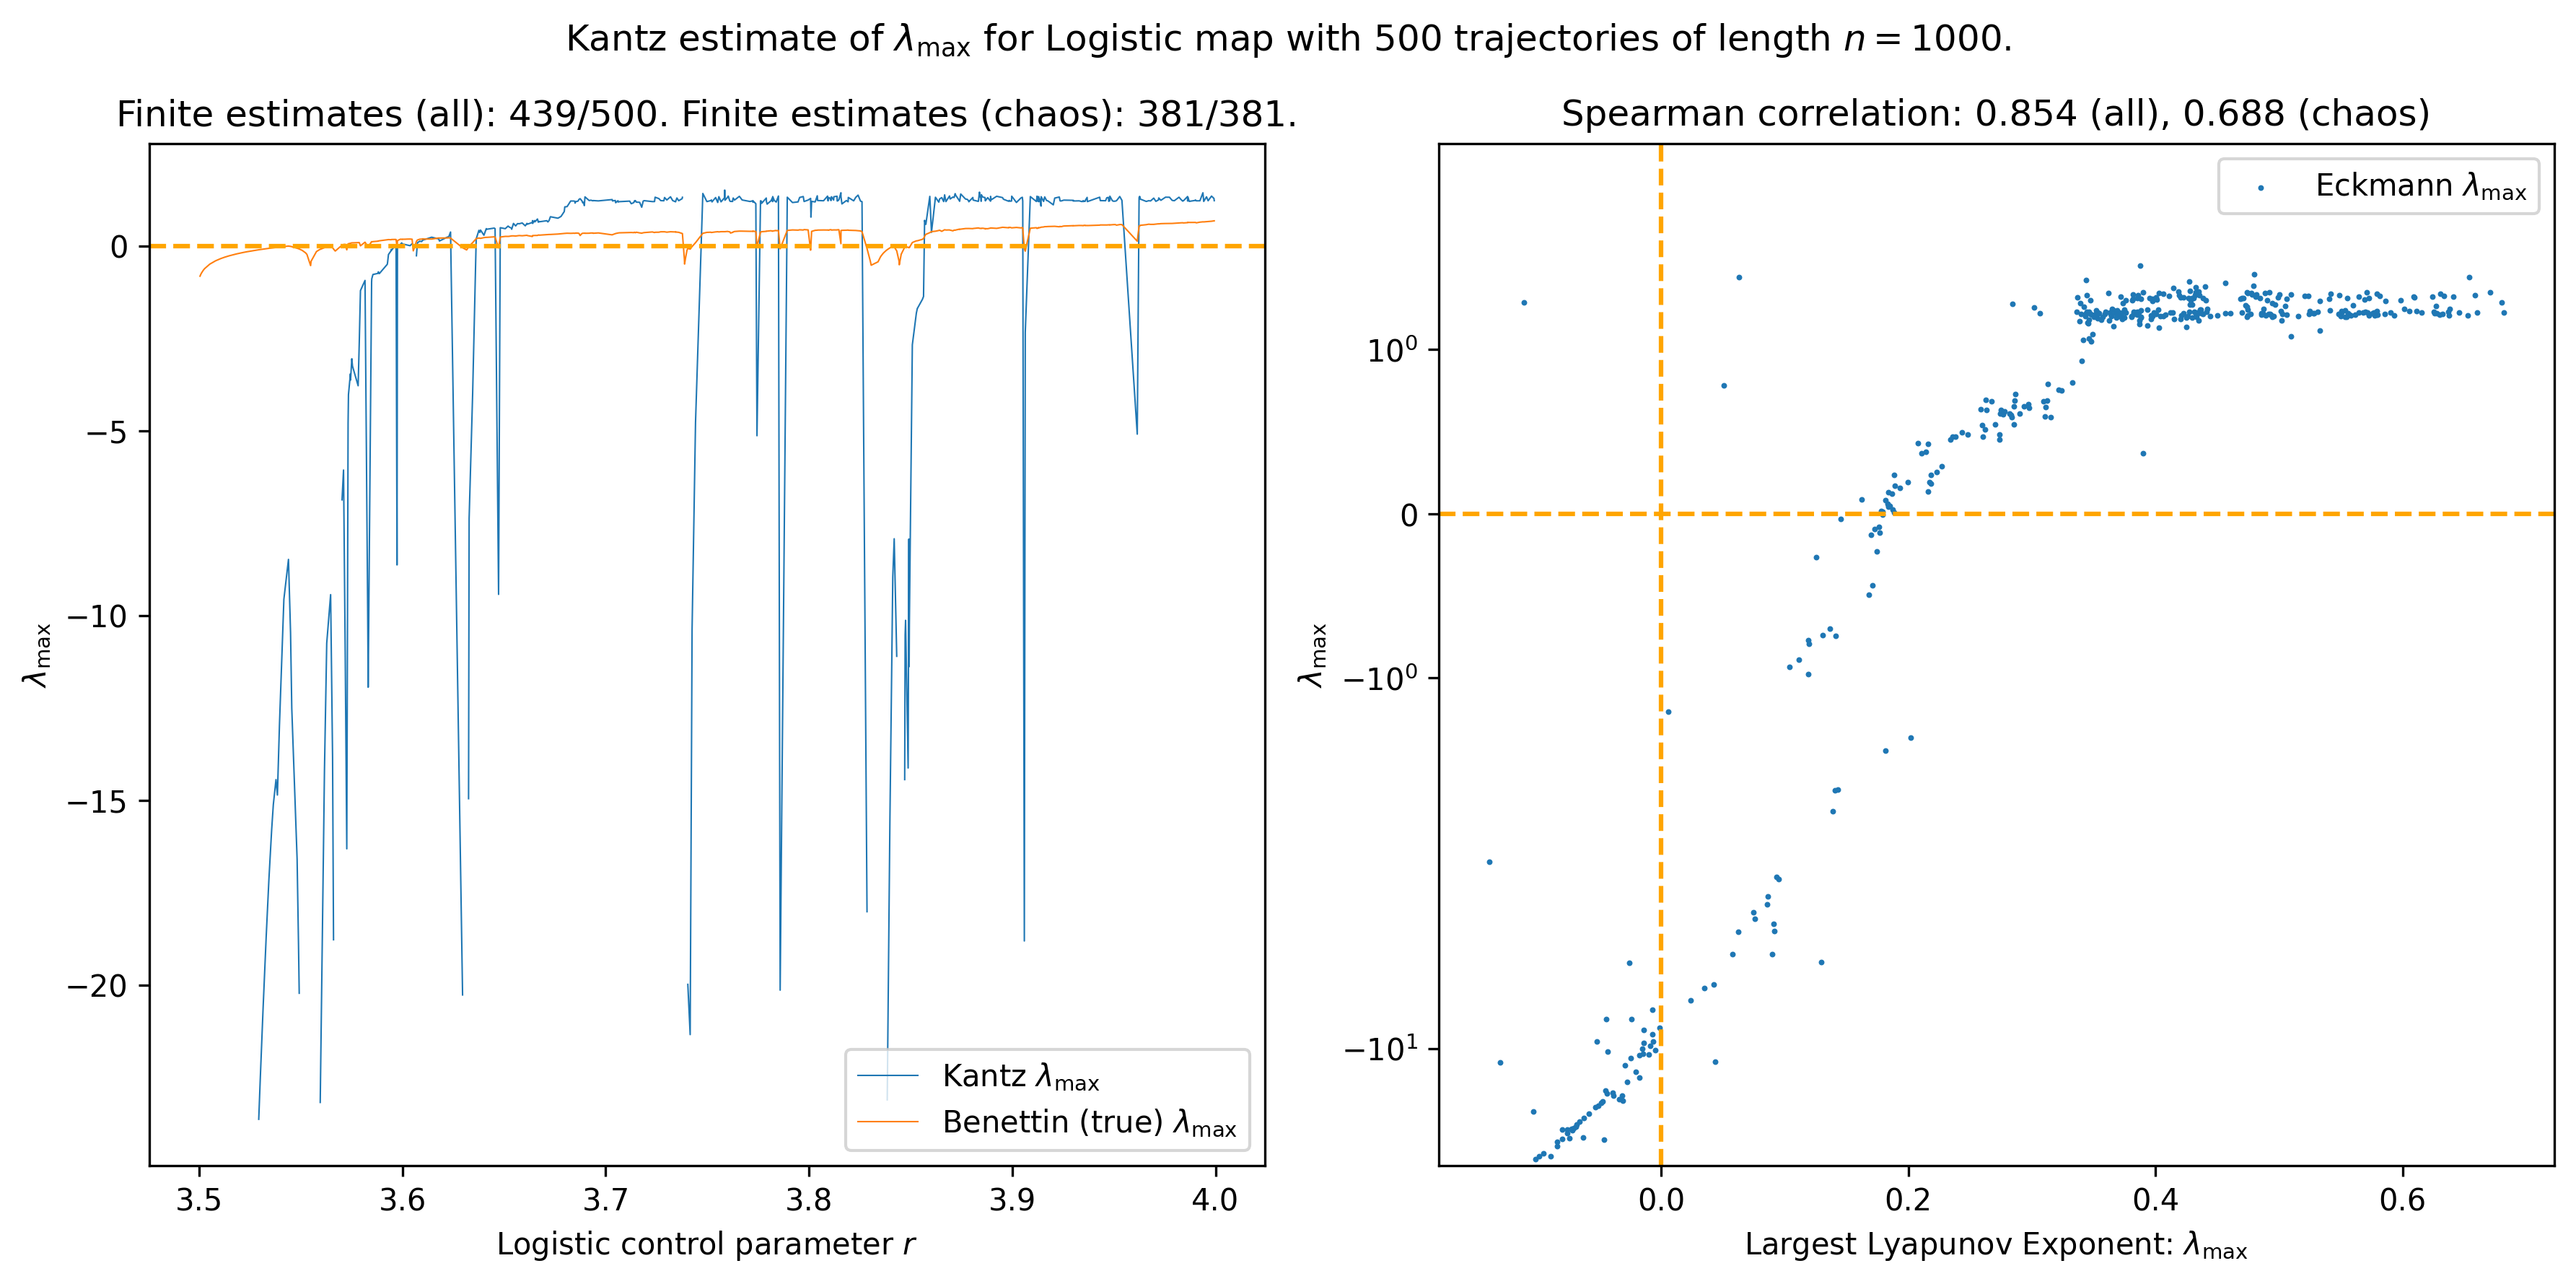

In [42]:
sequence_length = len(logistic_trajectories[0])-1
correlations["Kantz", "Logistic", sequence_length] = plot_lce_estimate_and_correlation(
    "Kantz",
    "Logistic",
    "r",
    kantz_logistic,
    logistic_lces,
    logistic_control_params,
    sequence_length,
    logy=True,
    sharey=False,
)


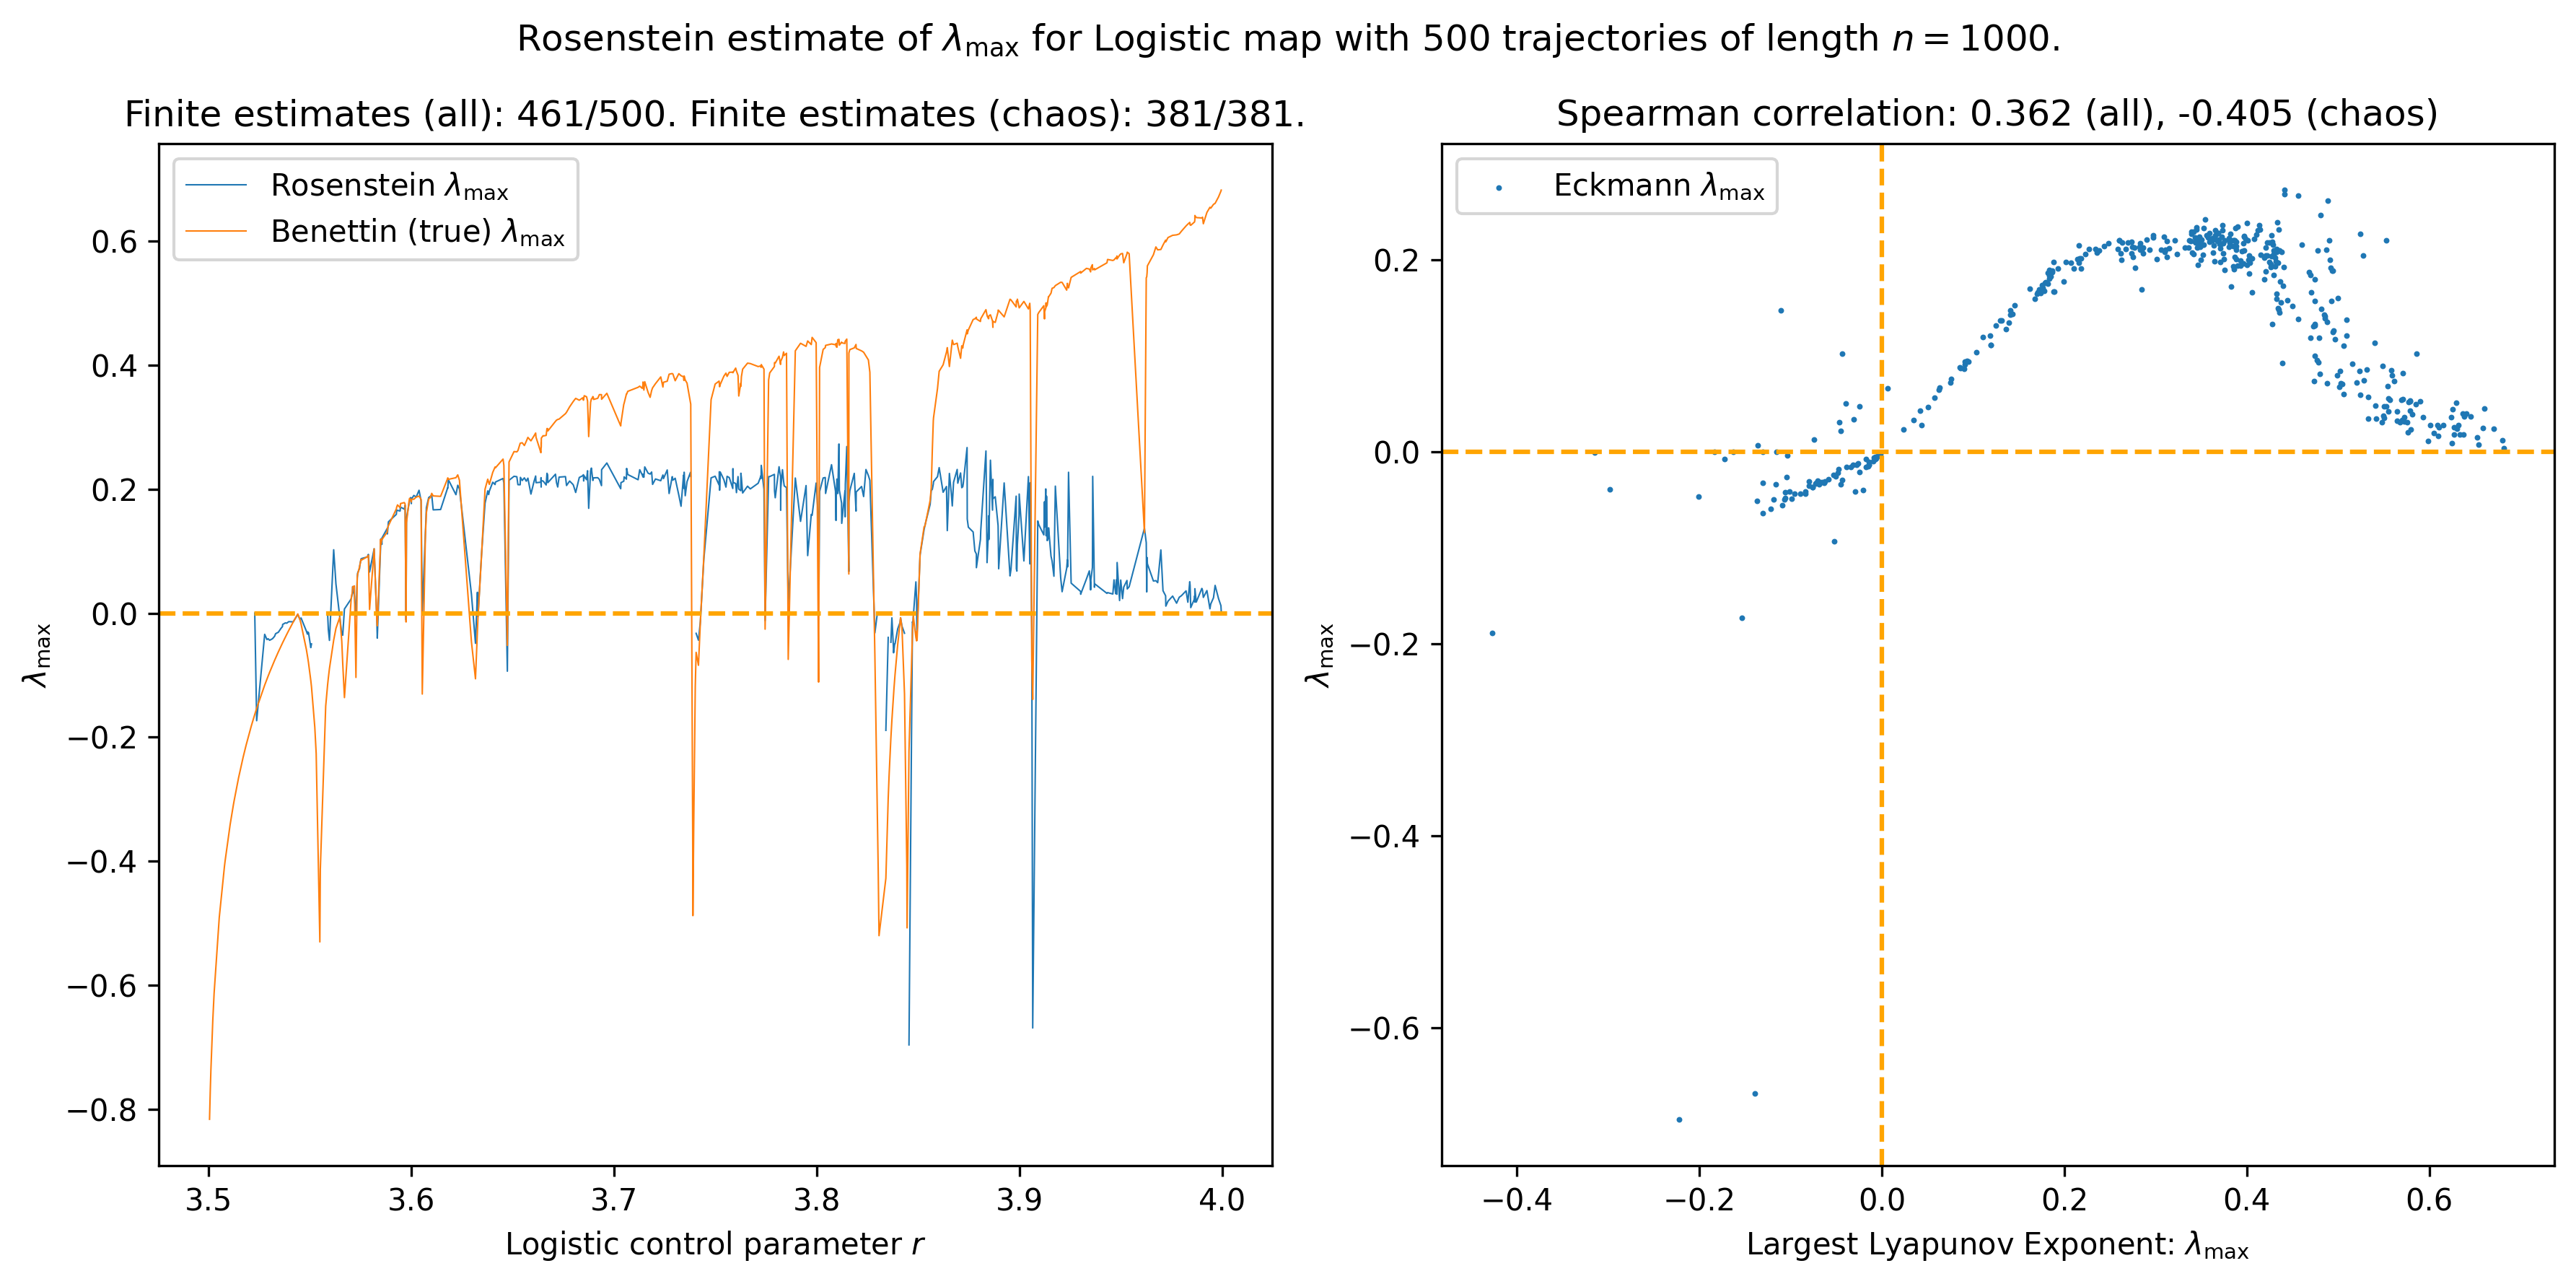

In [43]:
sequence_length = len(logistic_trajectories[0])-1
correlations["Rosenstein", "Logistic", sequence_length] = plot_lce_estimate_and_correlation(
    "Rosenstein",
    "Logistic",
    "r",
    rosenstein_logistic,
    logistic_lces,
    logistic_control_params,
    sequence_length,
    logy=False,
    sharey=False,
)


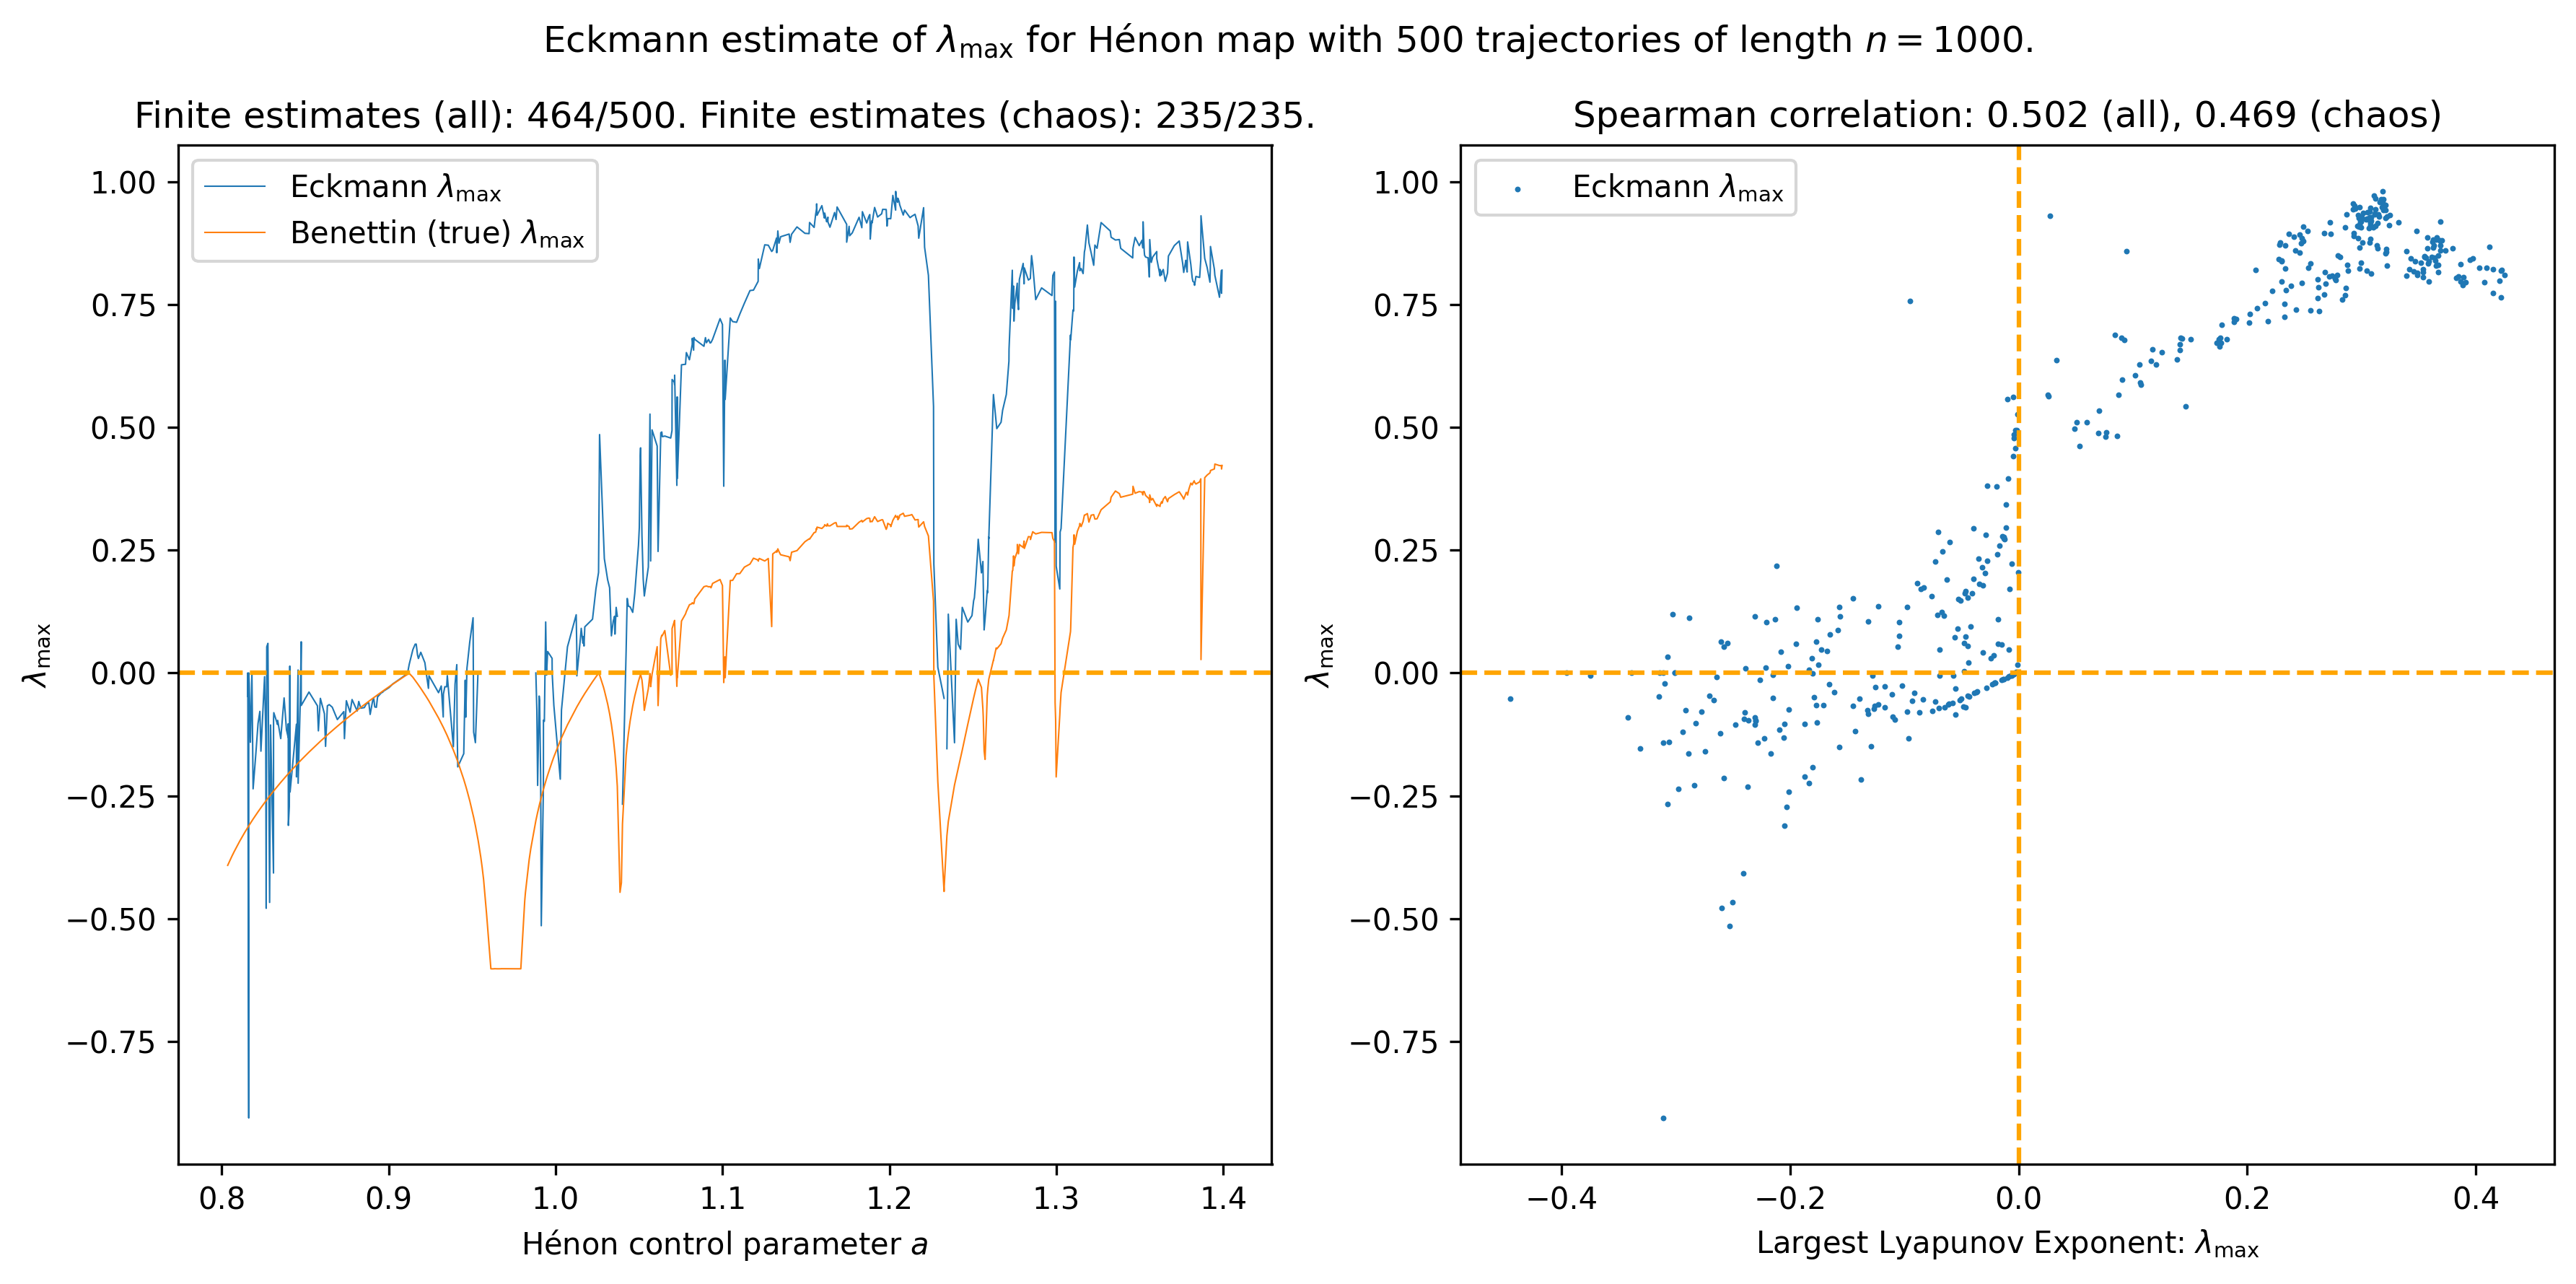

In [44]:
sequence_length = len(henon_trajectories[0])-1
correlations["Eckmann", "Hénon", sequence_length] = plot_lce_estimate_and_correlation(
    "Eckmann",
    "Hénon",
    "a",
    eckmann_henon,
    henon_lces,
    henon_control_params,
    sequence_length,
    logy=False,
    sharey=False,
)


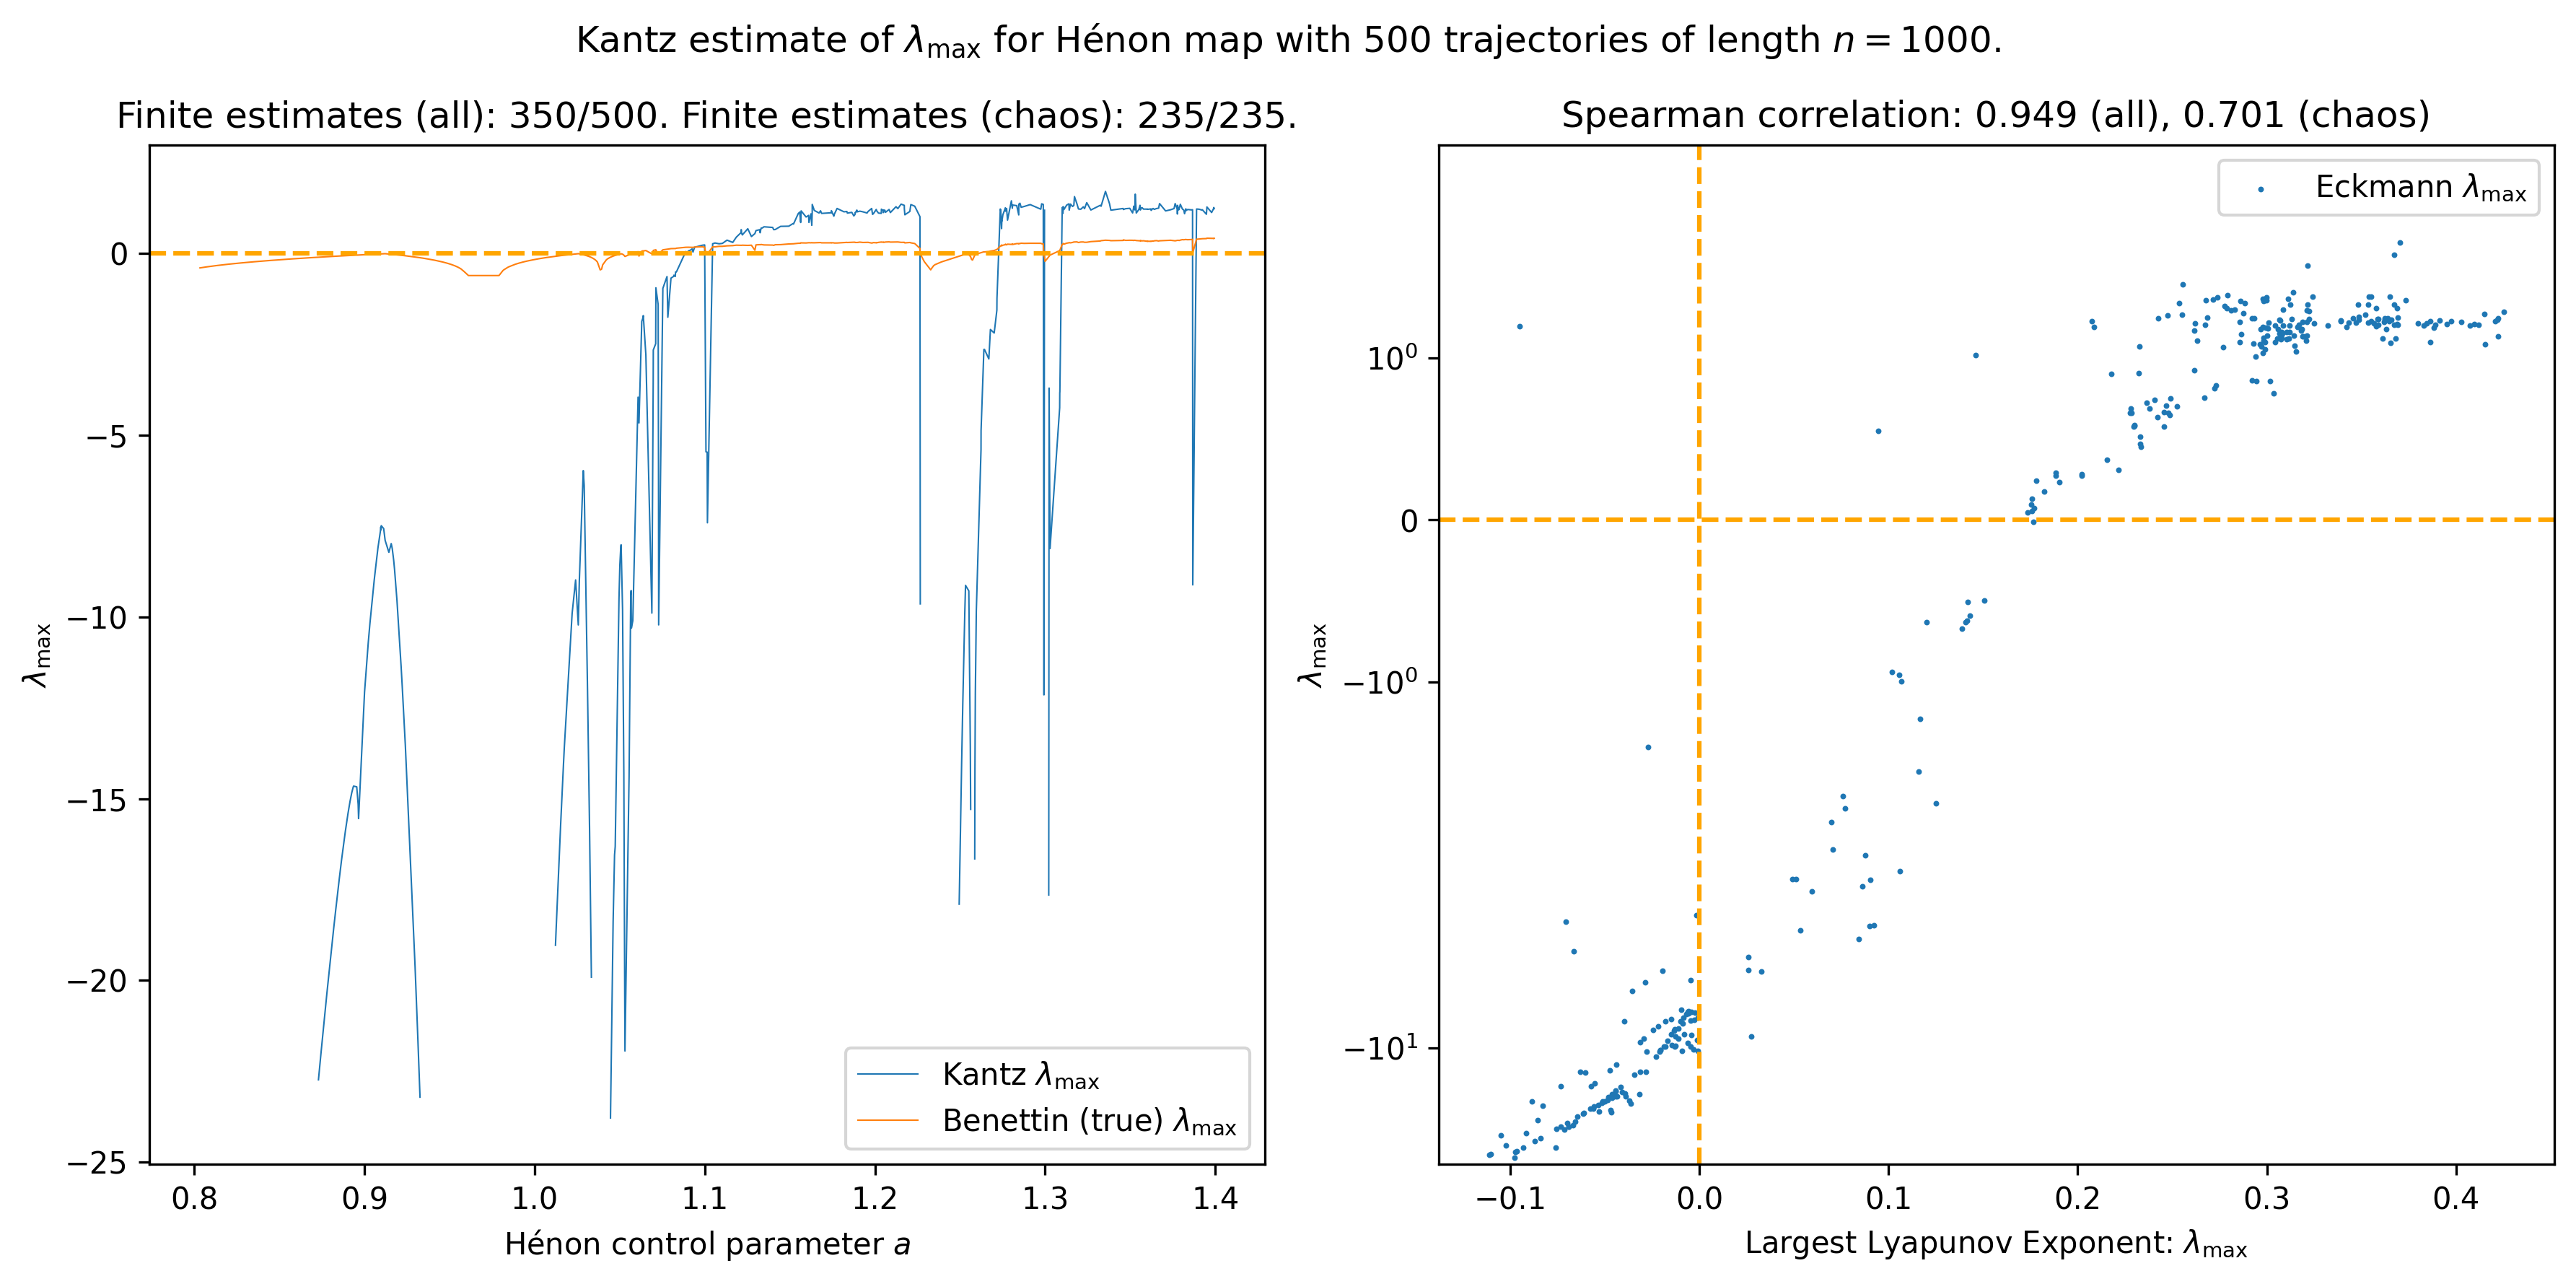

In [46]:
sequence_length = len(henon_trajectories[0])-1
correlations["Kantz", "Hénon", sequence_length] = plot_lce_estimate_and_correlation(
    "Kantz",
    "Hénon",
    "a",
    kantz_henon,
    henon_lces,
    henon_control_params,
    sequence_length,
    logy=True,
    sharey=False,
)


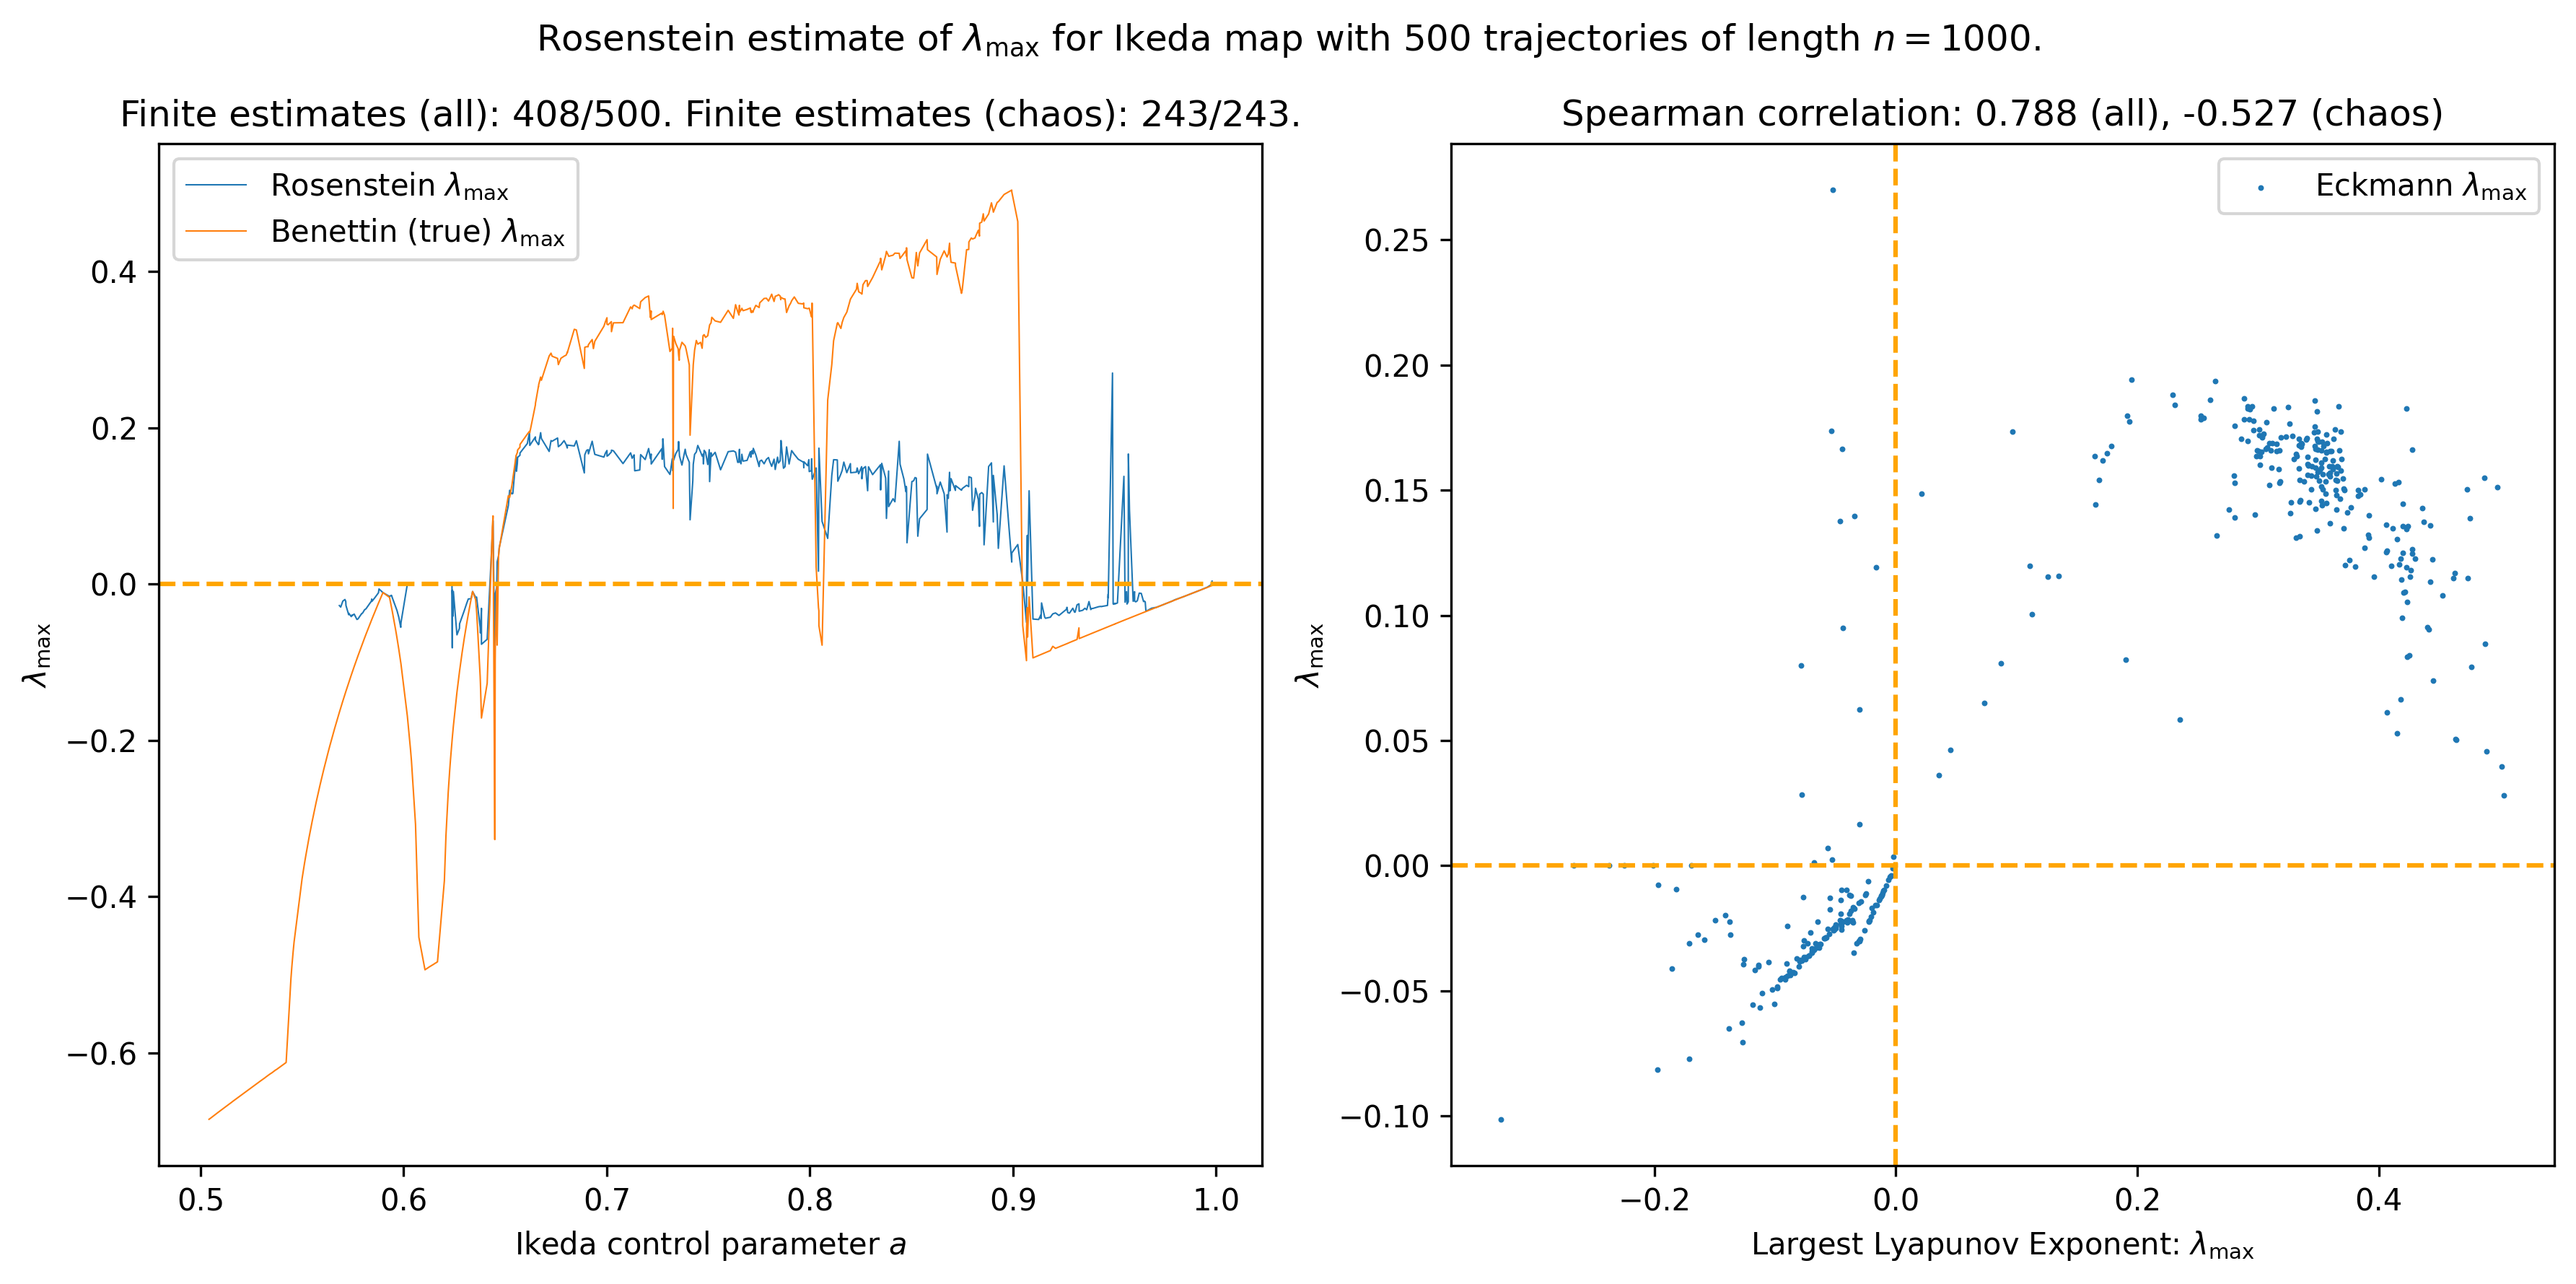

In [47]:
sequence_length = len(ikeda_trajectories[0])-1
correlations["Rosenstein", "Ikeda", sequence_length] = plot_lce_estimate_and_correlation(
    "Rosenstein",
    "Ikeda",
    "a",
    rosenstein_ikeda,
    ikeda_lces,
    ikeda_control_params,
    sequence_length,
    logy=False,
    sharey=False,
)


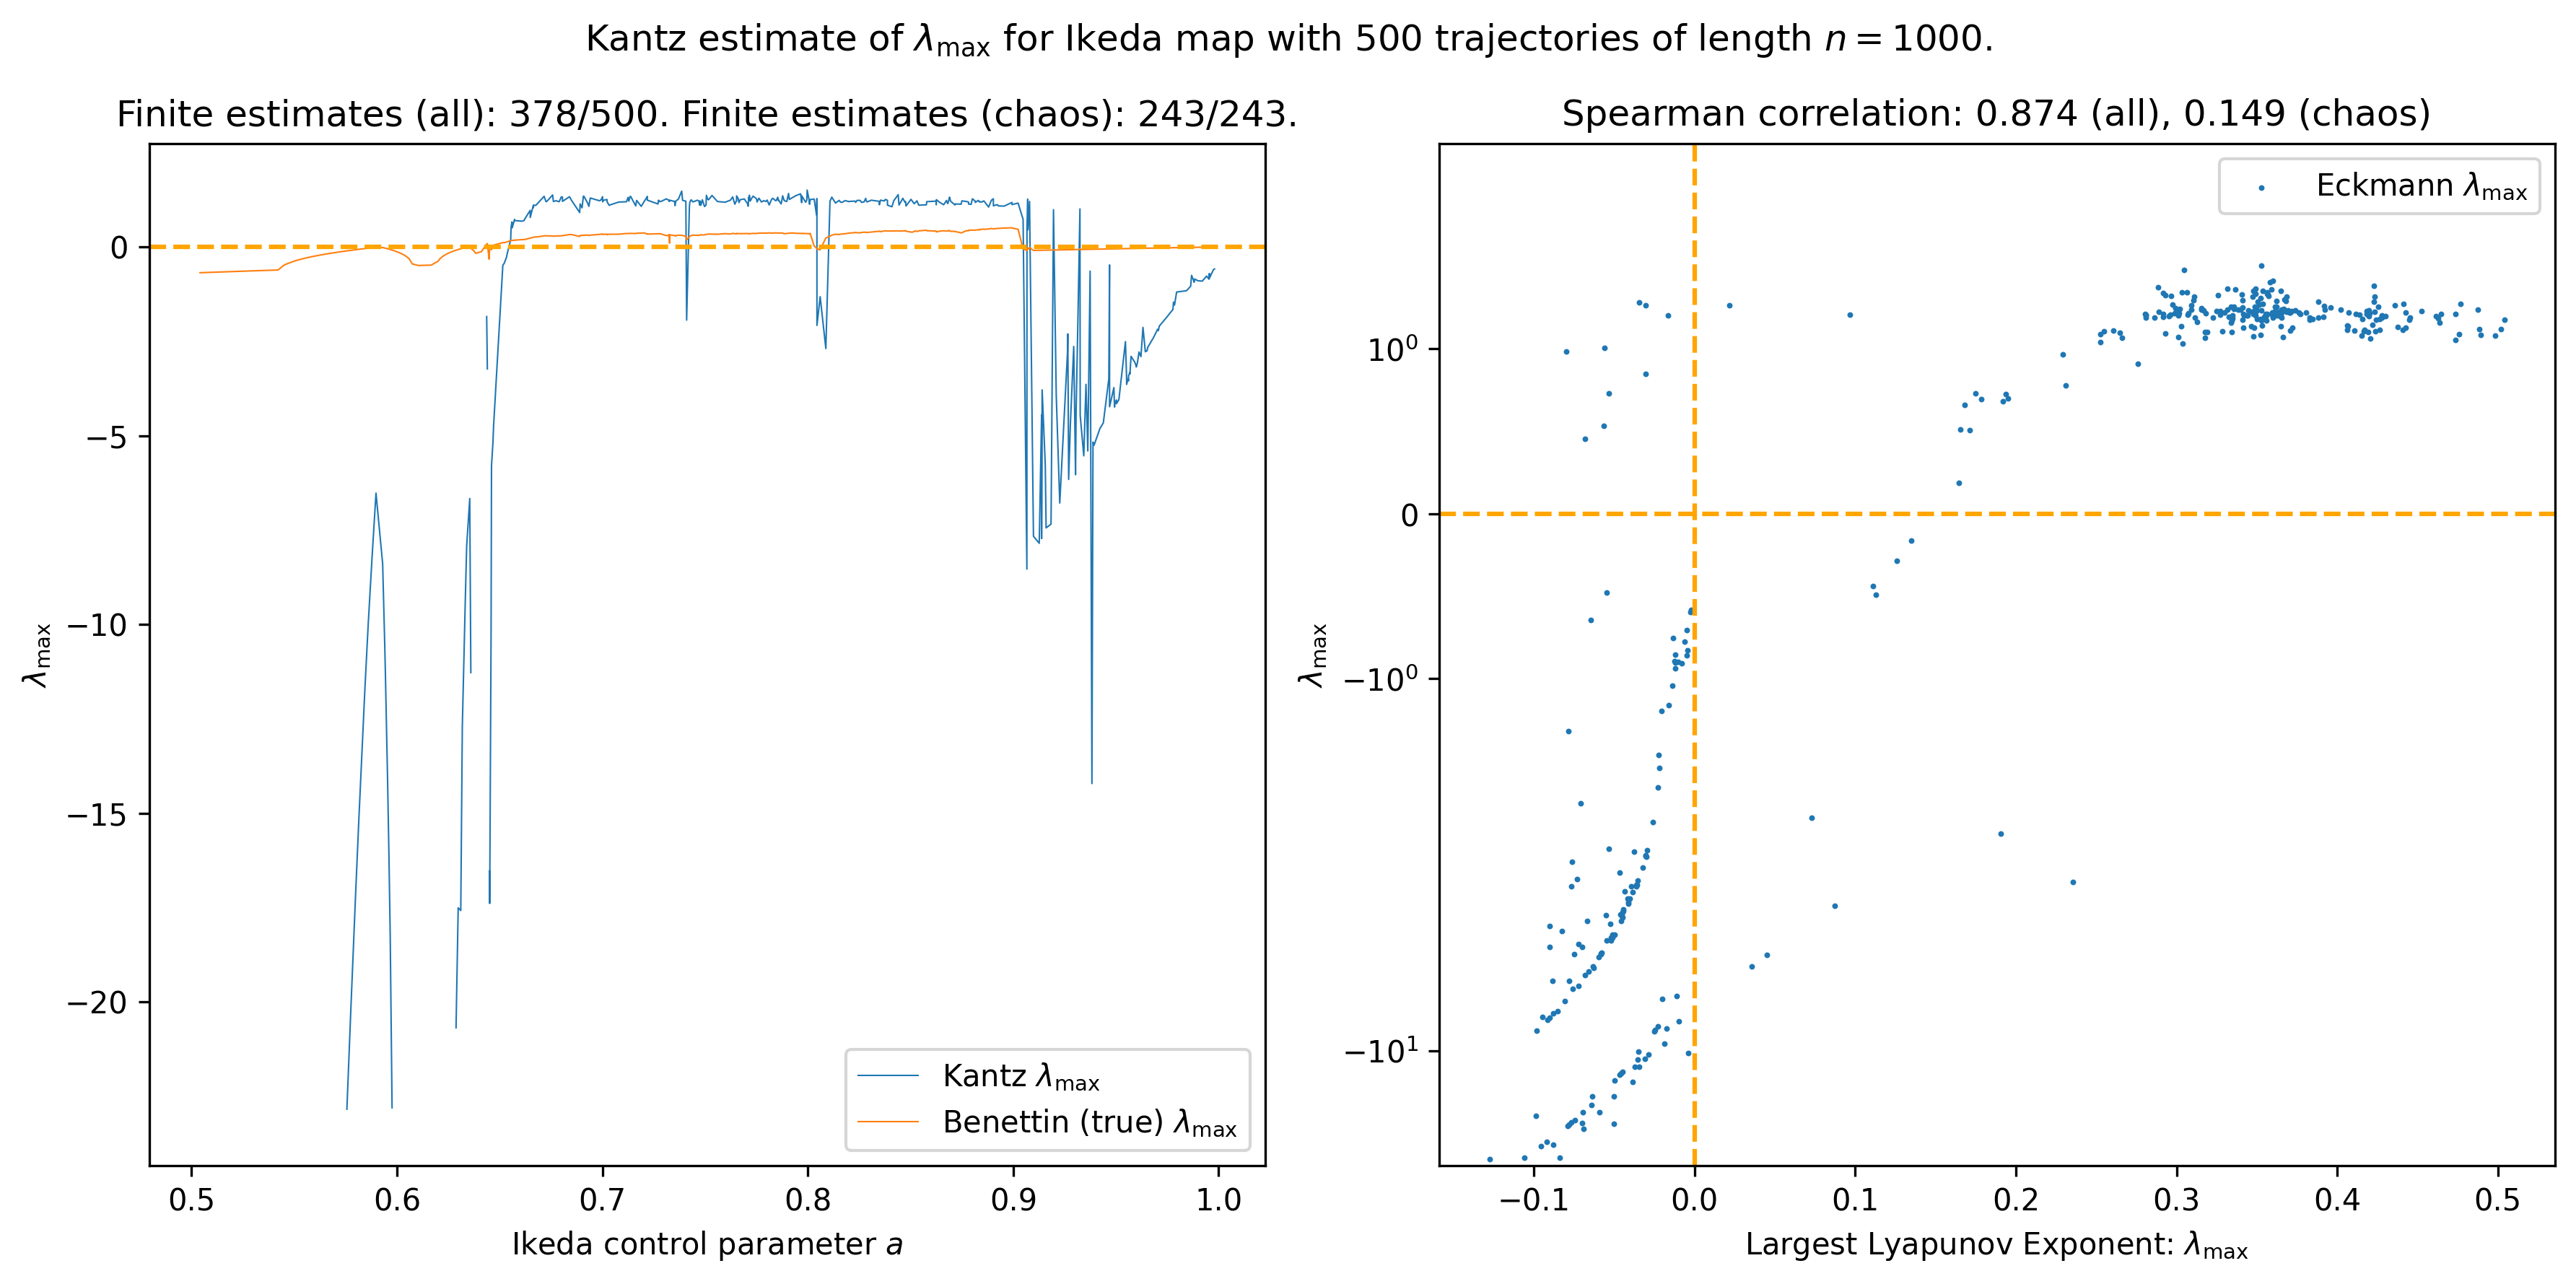

In [48]:
sequence_length = len(ikeda_trajectories[0])-1
correlations["Kantz", "Ikeda", sequence_length] = plot_lce_estimate_and_correlation(
    "Kantz",
    "Ikeda",
    "a",
    kantz_ikeda,
    ikeda_lces,
    ikeda_control_params,
    sequence_length,
    logy=True,
    sharey=False,
)


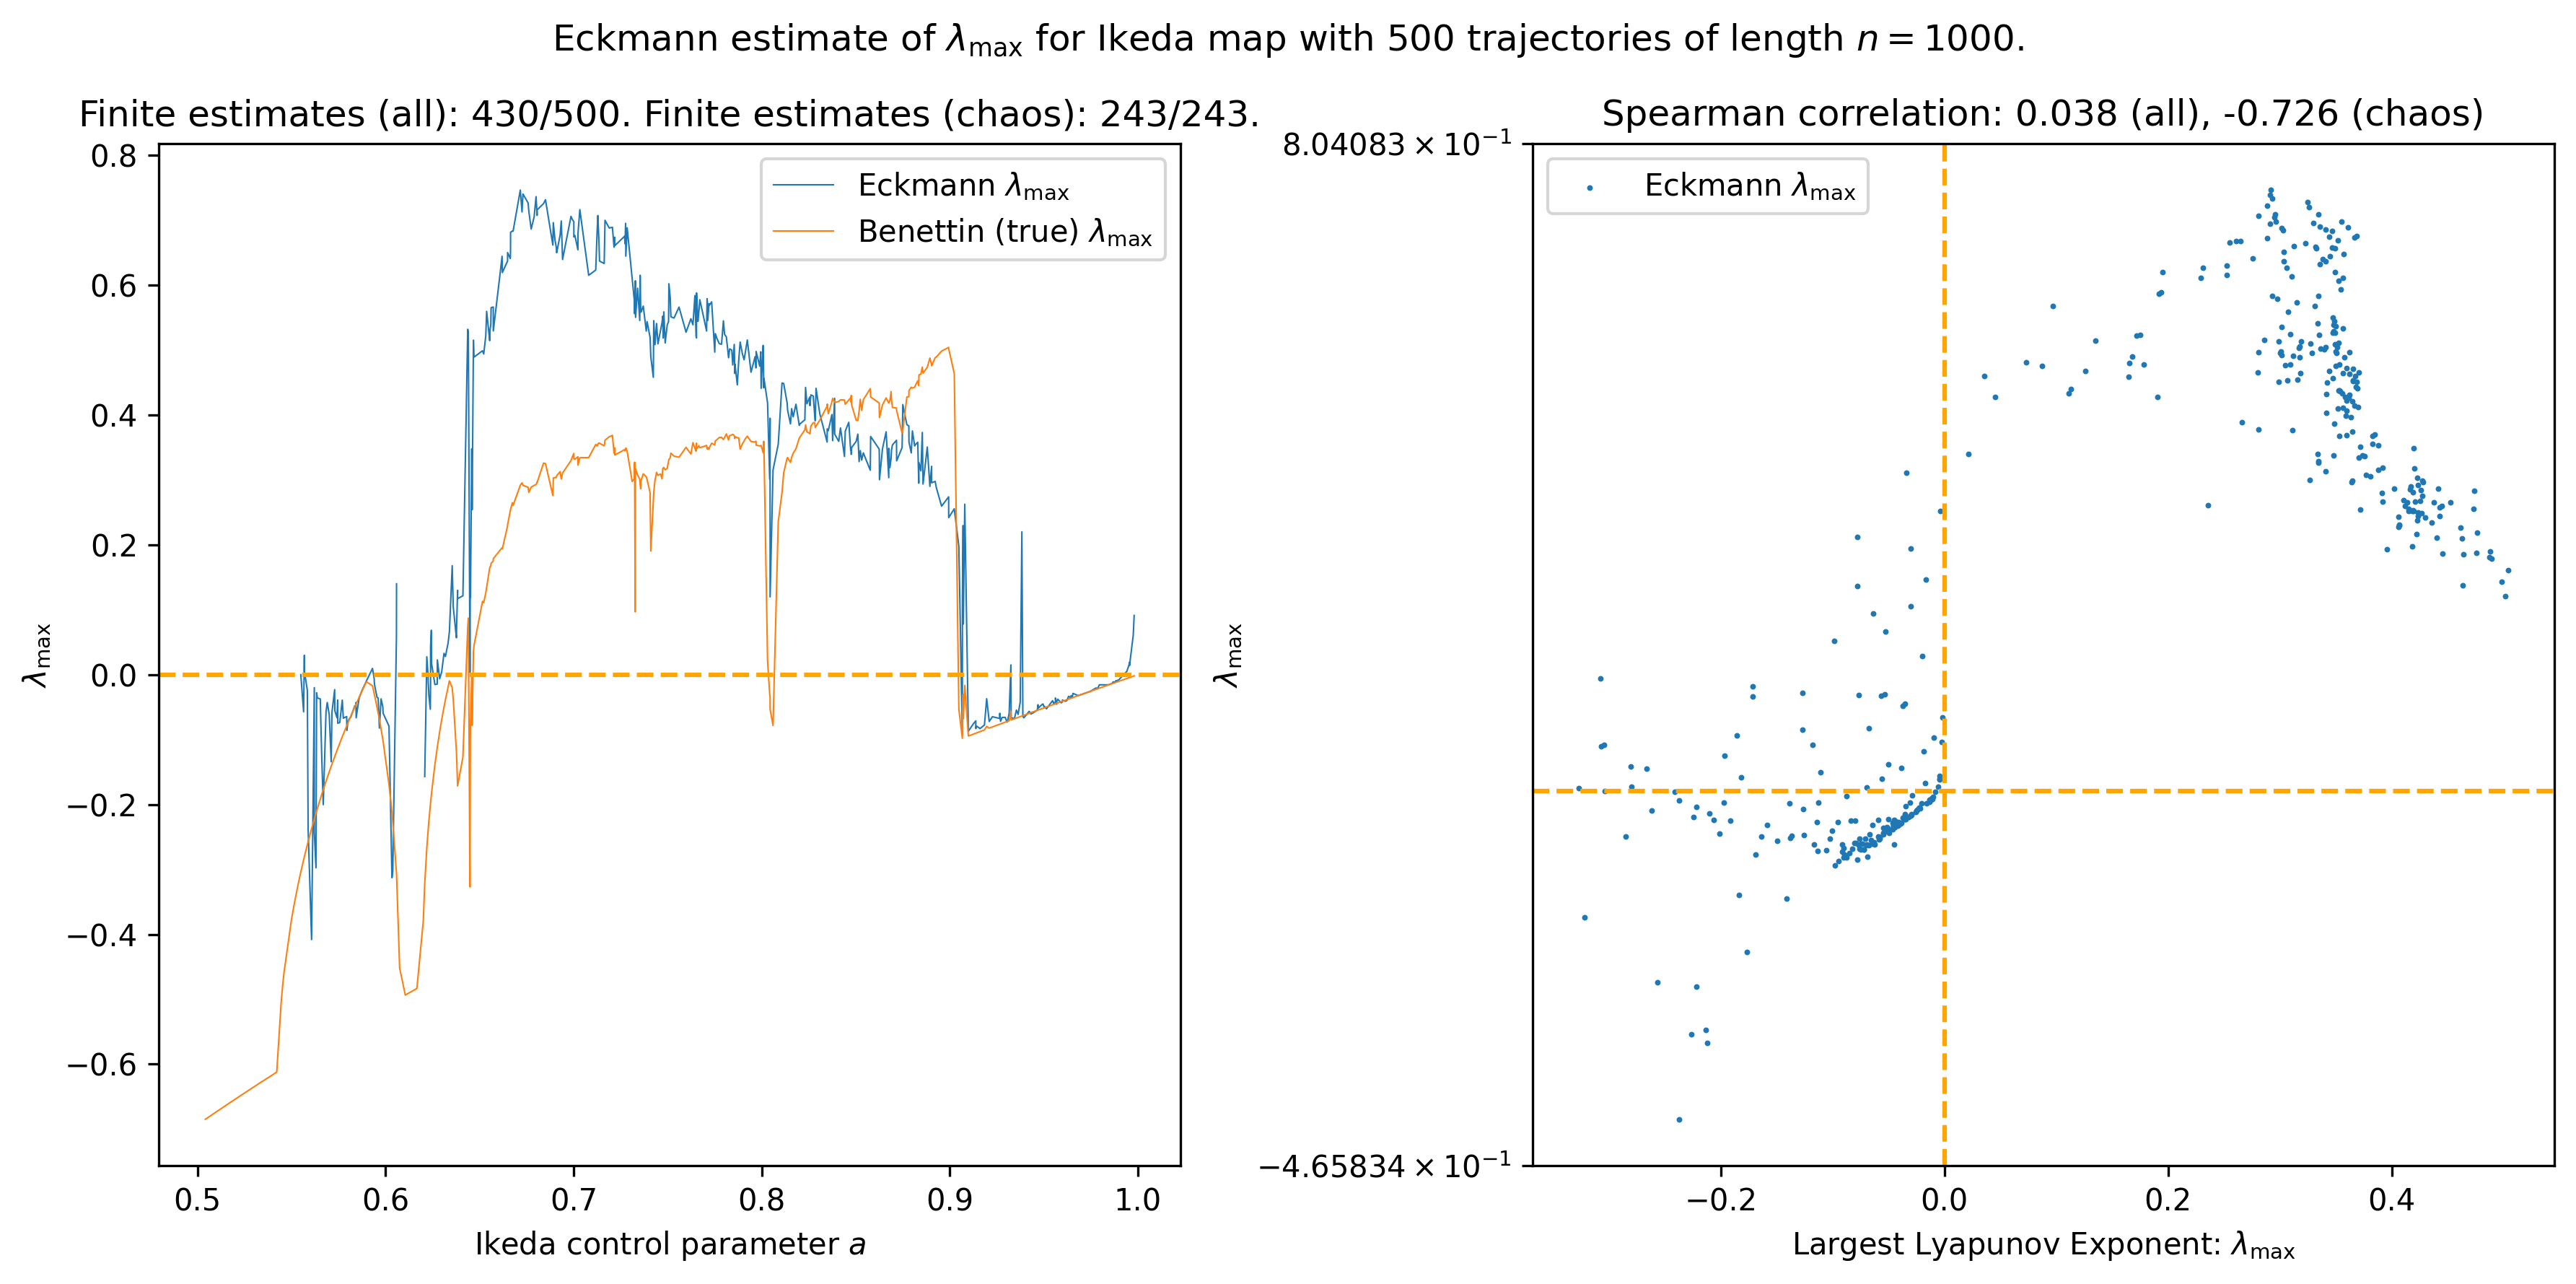

In [56]:
sequence_length = len(ikeda_trajectories[0])-1
correlations["Eckmann", "Ikeda", sequence_length] = plot_lce_estimate_and_correlation(
    "Eckmann",
    "Ikeda",
    "a",
    eckmann_ikeda,
    ikeda_lces,
    ikeda_control_params,
    sequence_length,
    logy=True,
    sharey=False,
)


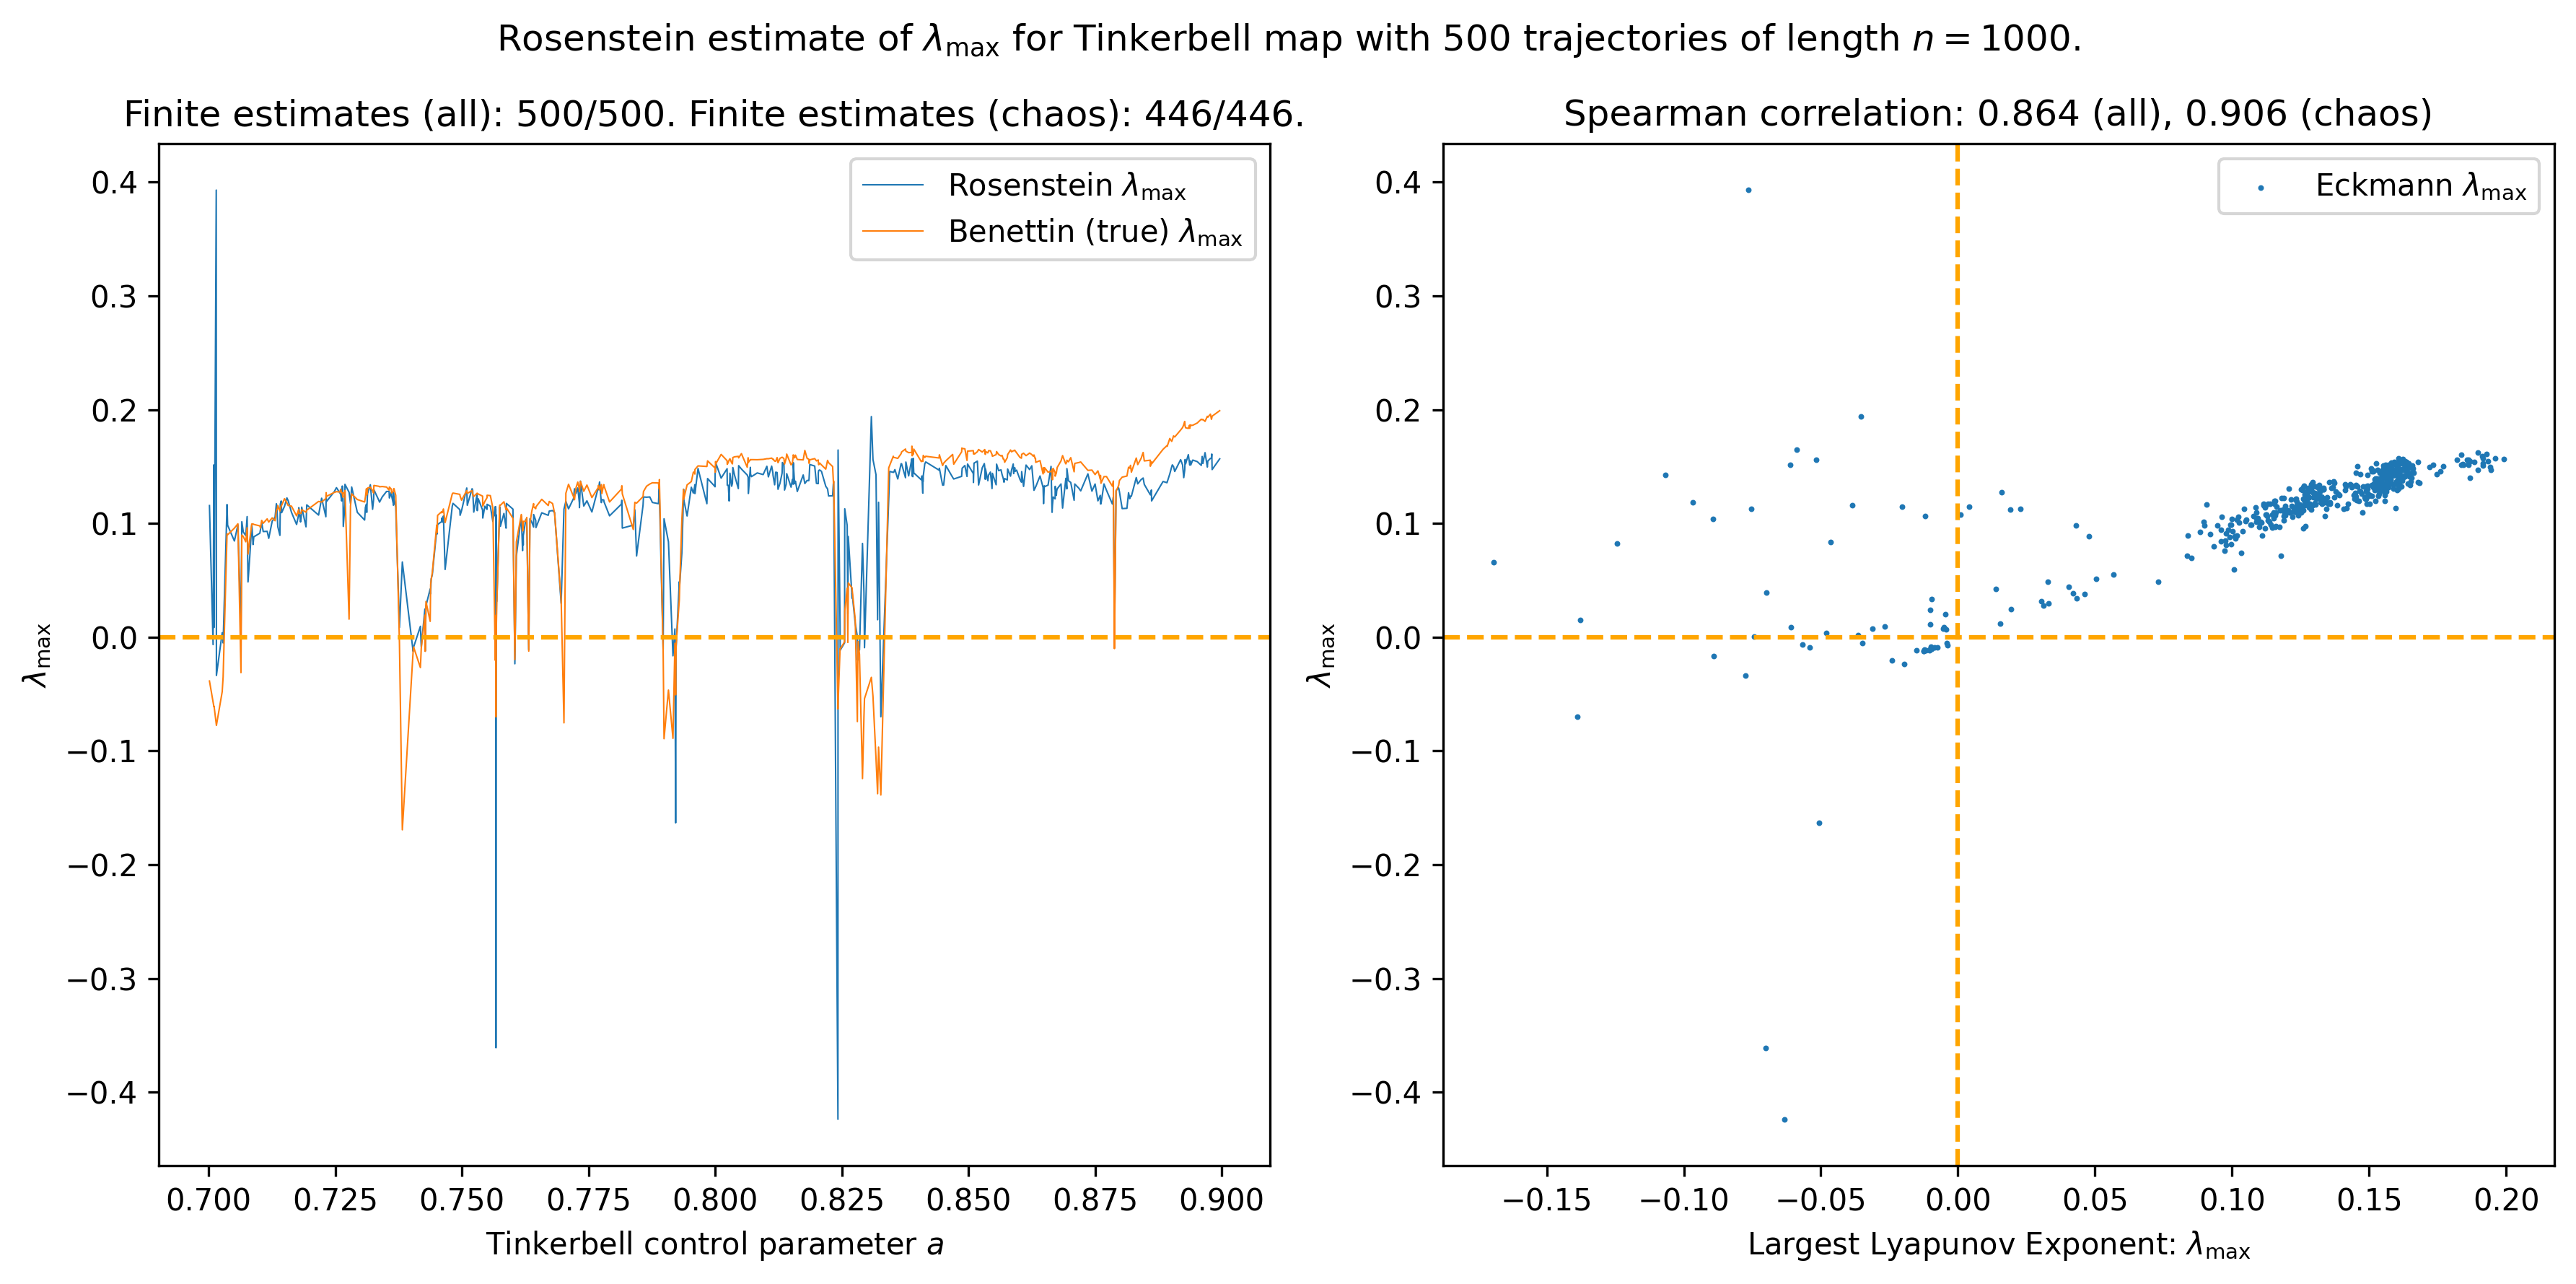

In [49]:
sequence_length = len(tinkerbell_trajectories[0])-1
correlations["Rosenstein", "Tinkerbell", sequence_length] = plot_lce_estimate_and_correlation(
    "Rosenstein",
    "Tinkerbell",
    "a",
    rosenstein_tinkerbell,
    tinkerbell_lces,
    tinkerbell_control_params,
    sequence_length,
    logy=False,
    sharey=False,
)


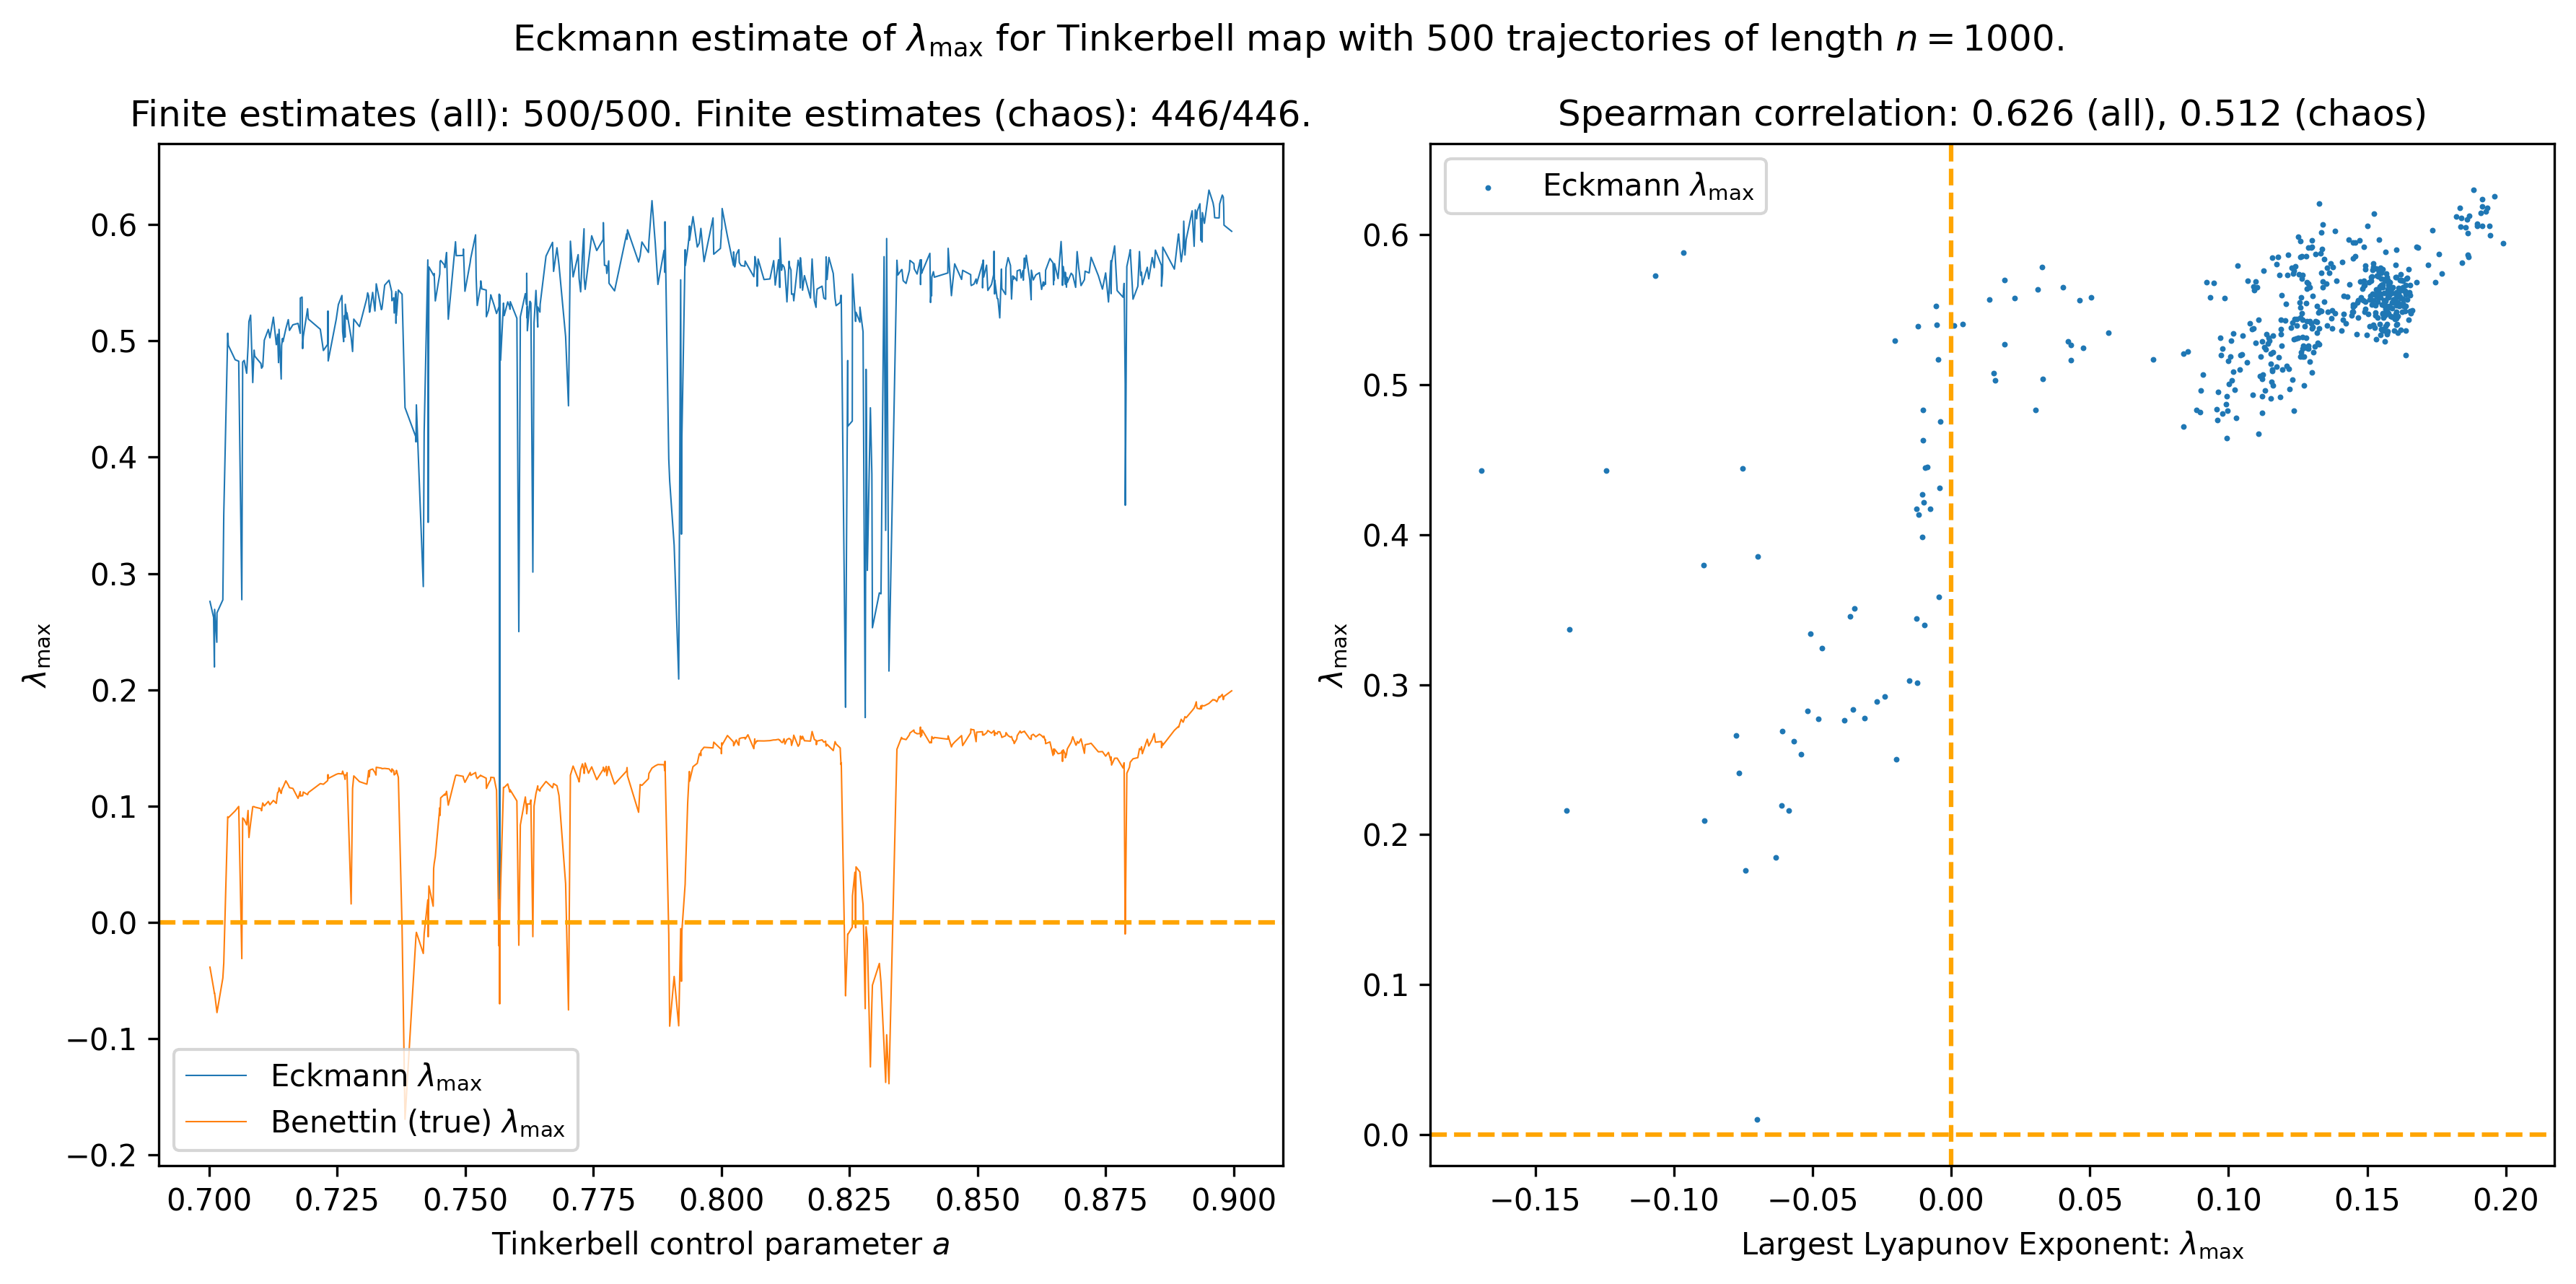

In [51]:
sequence_length = len(tinkerbell_trajectories[0])-1
correlations["Eckmann", "Tinkerbell", sequence_length] = plot_lce_estimate_and_correlation(
    "Eckmann",
    "Tinkerbell",
    "a",
    eckmann_tinkerbell,
    tinkerbell_lces,
    tinkerbell_control_params,
    sequence_length,
    logy=False,
    sharey=False,
)


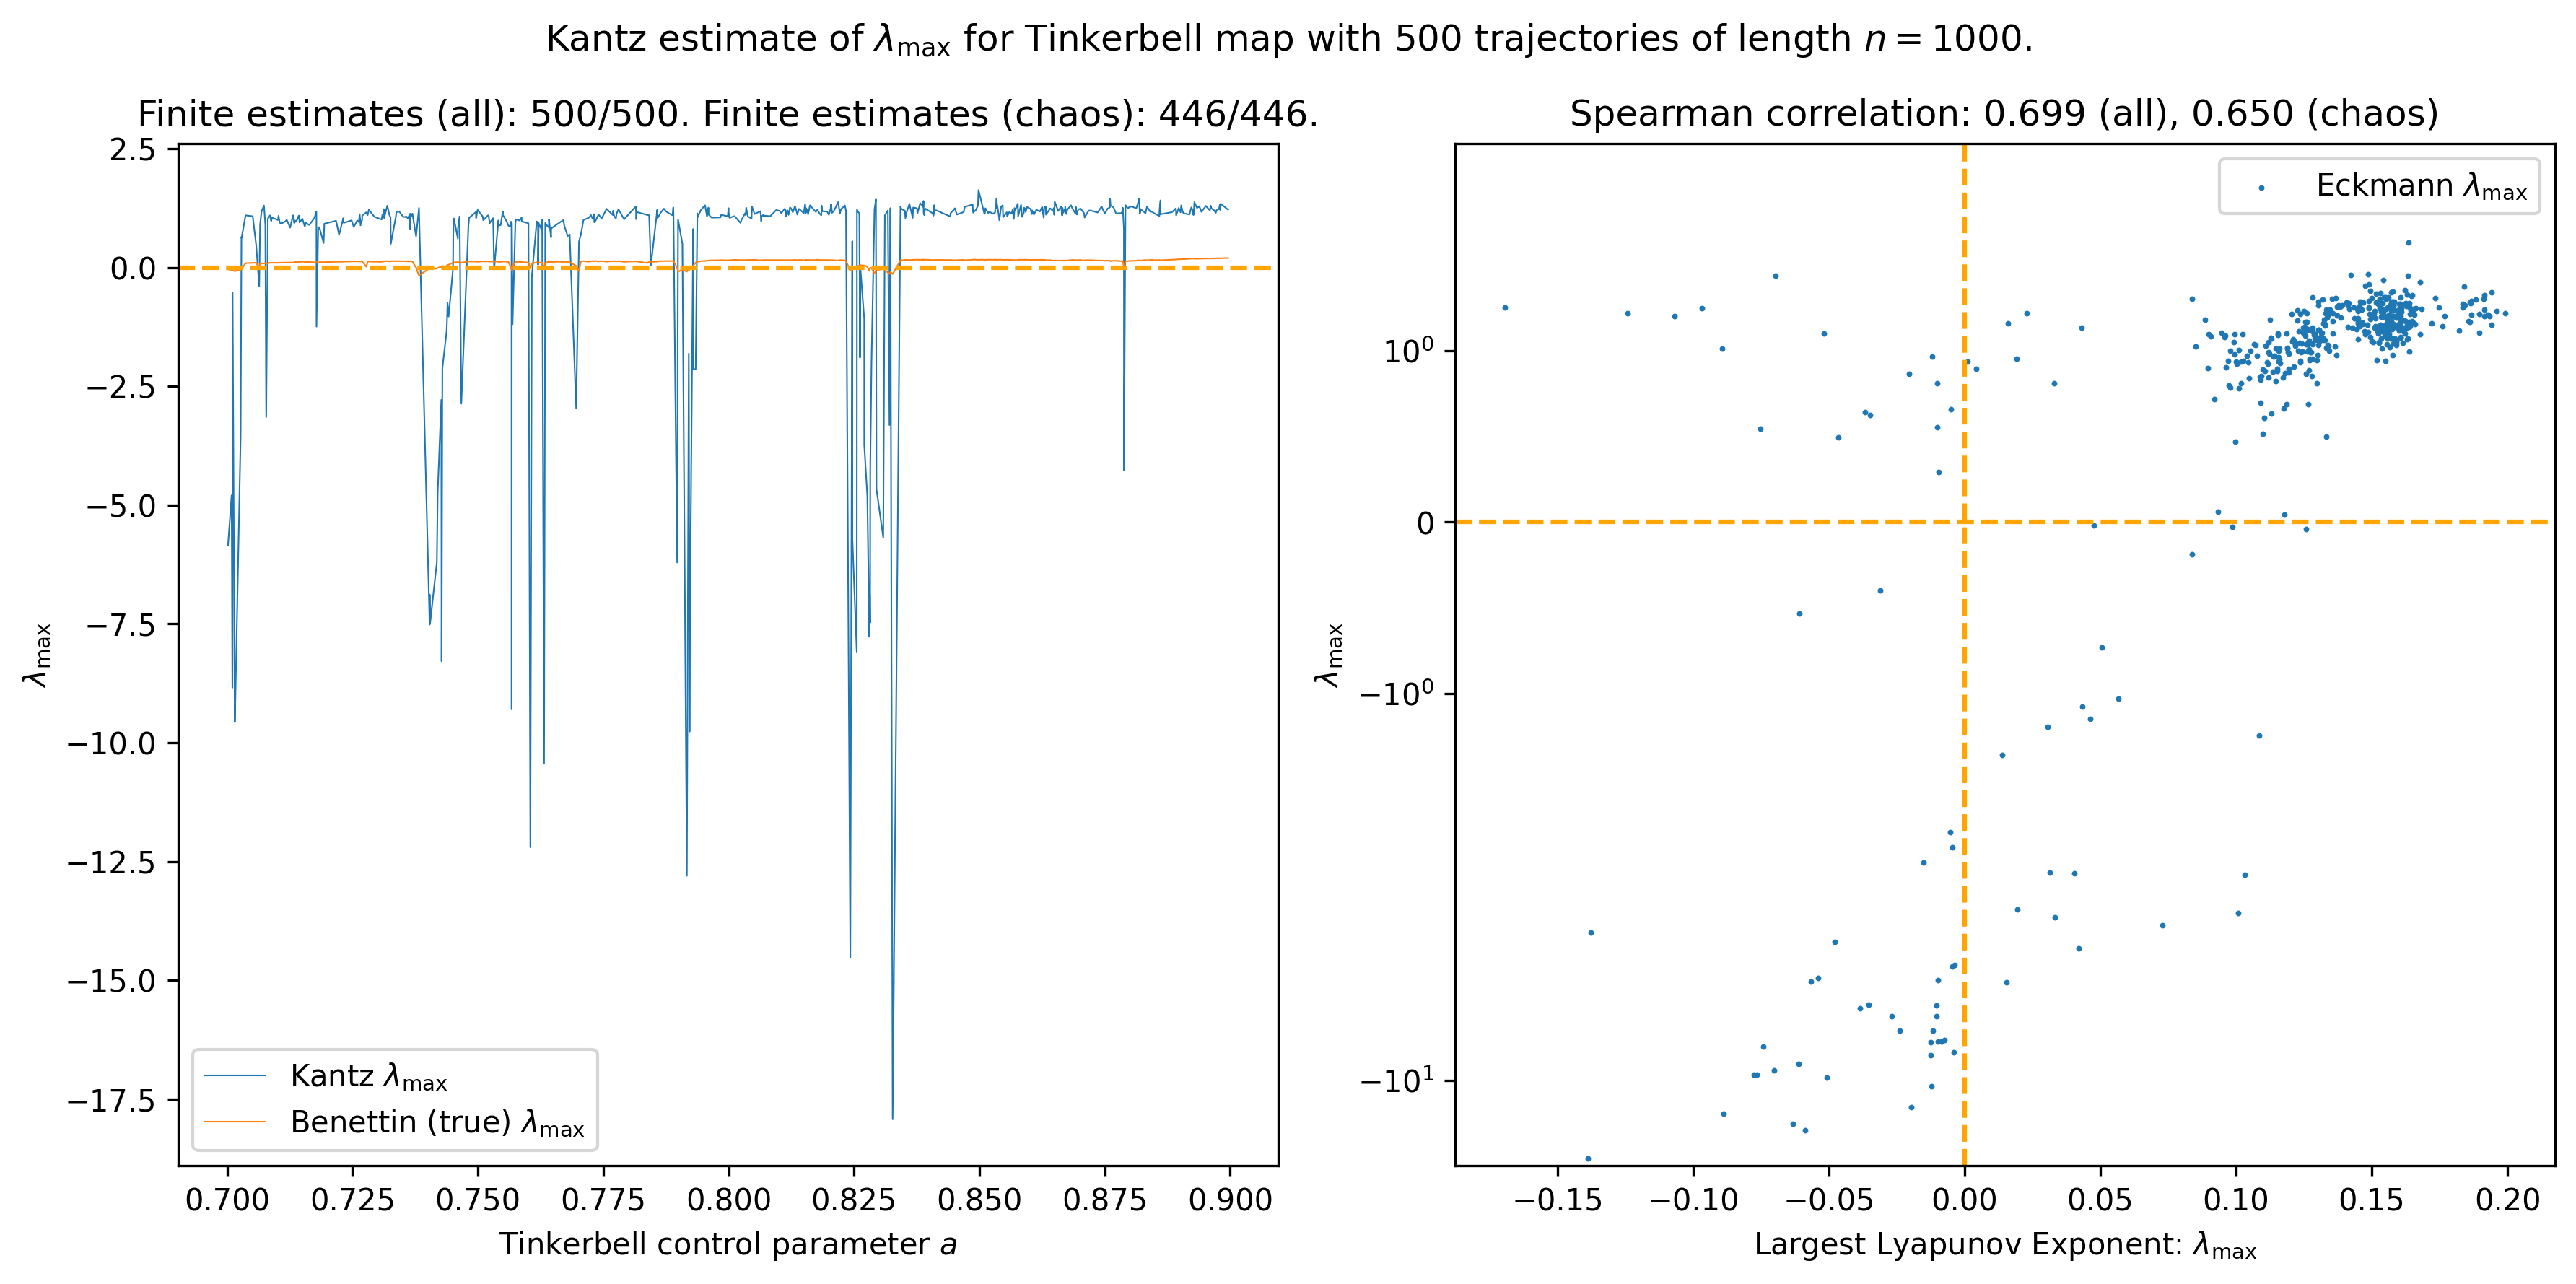

In [52]:
sequence_length = len(tinkerbell_trajectories[0])-1
correlations["Kantz", "Tinkerbell", sequence_length] = plot_lce_estimate_and_correlation(
    "Kantz",
    "Tinkerbell",
    "a",
    kantz_tinkerbell,
    tinkerbell_lces,
    tinkerbell_control_params,
    sequence_length,
    logy=True,
    sharey=False,
)


In [54]:
import pprint

In [57]:
pprint.pprint(correlations)

{('Eckmann', 'Hénon', 1000): (SpearmanrResult(correlation=0.5024374690876039, pvalue=2.4370504267745277e-33),
                              SpearmanrResult(correlation=0.4688155935902058, pvalue=3.0424935640552234e-14)),
 ('Eckmann', 'Ikeda', 1000): (SpearmanrResult(correlation=0.037937090554917945, pvalue=0.397284642020557),
                              SpearmanrResult(correlation=-0.7255591182565847, pvalue=5.38694046855931e-41)),
 ('Eckmann', 'Logistic', 1000): (SpearmanrResult(correlation=0.23298339915916863, pvalue=1.3693557868359535e-07),
                                 SpearmanrResult(correlation=-0.17801437675071544, pvalue=0.0004808392939976976)),
 ('Eckmann', 'Tinkerbell', 1000): (SpearmanrResult(correlation=0.6263708254833019, pvalue=7.697847751005744e-56),
                                   SpearmanrResult(correlation=0.5123849123648258, pvalue=3.190631344722502e-31)),
 ('Kantz', 'Hénon', 1000): (SpearmanrResult(correlation=0.9493695526149454, pvalue=1.4379935137474618e-2